In [ ]:
# Importing packages.
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Loading the dataset.
# Dataset is from the Framingham Heart Study research institute, Massachusetts
# https://biolincc.nhlbi.nih.gov/requests/teaching-dataset-request/12562/

heart_disease = pd.read_csv('frmgham2.csv')

In [ ]:
heart_disease.head()

RANDID  SEX  TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY    BMI  \
0    2448    1    195.0   39  106.0   70.0         0      0.0  26.97   
1    2448    1    209.0   52  121.0   66.0         0      0.0    NaN   
2    6238    2    250.0   46  121.0   81.0         0      0.0  28.73   
3    6238    2    260.0   52  105.0   69.5         0      0.0  29.43   
4    6238    2    237.0   58  108.0   66.0         0      0.0  28.50   

   DIABETES  ...  HDLC   LDLC  DEATH  ANGINA  HOSPMI  MI_FCHD  ANYCHD  STROKE  \
0         0  ...   NaN    NaN      0       0       1        1       1       0   
1         0  ...  31.0  178.0      0       0       1        1       1       0   
2         0  ...   NaN    NaN      0       0       0        0       0       0   
3         0  ...   NaN    NaN      0       0       0        0       0       0   
4         0  ...  54.0  141.0      0       0       0        0       0       0   

   CVD  CHD  
0    1    1  
1    1    1  
2    0    0  
3    0    0  
4    0    0  

[5 rows x 31 columns]

- Demographic:
     - SEX: 1 - male, 2 - female
     - AGE: Age of the patient. (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
     - EDUCATION: Attained Education.
          - 1 = 0 -11 years
          - 2 = High School Diploma, GED
          - 3 = Some College, Vocational School
          - 4 = College (BS, BA) degree or more
- Behavioral:
     - CURSMOKE: whether or not the patient is a current smoker, current smoker - 1, not smoker - 0 (Binominal).
     - CIGPDAY: number of cigarettes smoked each day (0 = Not current smoker; 1-90 cigarettes per day). (Can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
- Medical:
     - BPMEDS: whether or not the patient was on blood pressure medication; 0 - no blood pressure medication, 1 - yes (Binominal)
     - TOTCHOL: total cholesterol level (mg/dL); (Continuous)
     - HDLC: High Density Lipoprotein Cholesterol (mg/dL); (Continious)
     - LDLC: Low Density Lipoprotein Cholesterol (mg/dL); (Continious)
     - SYSBP: systolic blood pressure, the higher, the greater the risk of heart disease and stroke (Continuous).
     - DIABP: diastolic blood pressure (Continuous).
     - BMI: Body Mass Index (Continuous).
     - HEARTRTE: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
     - GLUCOSE: glucose level (mg/dL); (Continuous).
     - PREVAP: Prevalent Angina Pectoris at exam: 0 = Free of disease,
1 = Prevalent disease (Binominal)
     - PREVCHD: Prevalent Coronary Heart Disease: 0 = Free of disease,
1 = Prevalent disease (Binominal)
     - PREVMI: Prevalent Myocardial Infarction: 0 = Free of disease,
1 = Prevalent disease (Binominal)
     - PREVSTRK: Prevalent Stroke: 0 = Free of disease, 1 = Prevalent disease (Binominal)
     - PREVHYP: Prevalent Hypertensive: 0 = Free of disease, 1 = Prevalent disease (Binominal)
     - DIABETES: whether patient diabetic or not: 0 = Not a diabetic,
1 = Diabetic (Binominal)

- Predict variable (desired target):
     - CHD: whether patient is at risk of any kind of heart disease: Myocardial infarction, Coronary Heart Disease, Atherothrombotic infarction, Cerebral Embolism, Intracerebral Hemorrhage, or Subarachnoid Hemorrhage or Cerebrovascular Disease (binary: “1, means “Yes” “0” means “No”)

In [ ]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

Text(0.5, 1.0, 'Distribution in the CHD column')

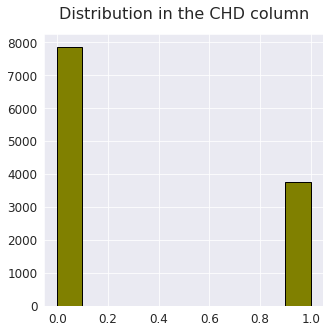

In [ ]:
# Performing exploratory data analysis.
# Target variable distribution.
sns.set_style('darkgrid')
heart_disease.CHD.hist(xlabelsize = 12, xrot = 0, ylabelsize = 12, figsize = (5,5), color ='olive',
                  edgecolor ='black').set_title('Distribution in the CHD column', fontdict={'fontsize':16}, pad = 15)

In [ ]:
# Checking data balance.
print('Heart disease rate', heart_disease.CHD.mean())

Heart disease rate 0.32355723746452225


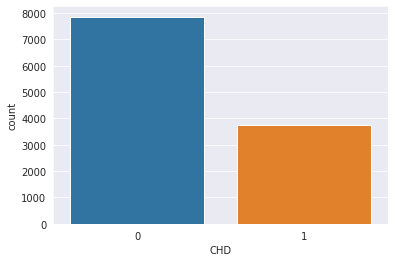

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x = heart_disease['CHD'])

In [ ]:
heart_disease.CHD.value_counts()

0    7865
1    3762
Name: CHD, dtype: int64

In [ ]:
heart_disease.groupby('CHD').mean()

RANDID       SEX     TOTCHOL        AGE       SYSBP      DIABP  \
CHD                                                                         
0    4.980830e+06  1.620725  238.101834  53.347362  132.558996  81.663001   
1    5.054730e+06  1.458001  247.541930  57.814726  144.195641  85.911882   

     CURSMOKE   CIGPDAY        BMI  DIABETES  ...    PERIOD       HDLC  \
CHD                                           ...                        
0    0.433566  8.179166  25.501316  0.023776  ...  1.910108  50.834526   
1    0.430356  8.399304  26.665107  0.091175  ...  1.876661  46.050538   

           LDLC     DEATH    ANGINA    HOSPMI   MI_FCHD    ANYCHD    STROKE  \
CHD                                                                           
0    174.288031  0.189193  0.000000  0.000000  0.000000  0.000000  0.000000   
1    181.385361  0.541999  0.505582  0.306752  0.475279  0.839447  0.282031   

          CVD  
CHD            
0    0.000000  
1    0.770601  

[2 rows x 30 columns]

In [ ]:
heart_disease.groupby('SEX').mean()

RANDID     TOTCHOL        AGE       SYSBP      DIABP  CURSMOKE  \
SEX                                                                         
1    5.075776e+06  234.281790  54.493628  135.073377  83.692652  0.516527   
2    4.950731e+06  246.527844  55.020288  137.275095  82.539818  0.368660   

       CIGPDAY        BMI  DIABETES    BPMEDS  ...       HDLC        LDLC  \
SEX                                            ...                          
1    11.640481  26.203817  0.050378  0.058860  ...  43.711656  170.548313   
2     5.670784  25.628734  0.041938  0.105911  ...  53.643064  180.948897   

        DEATH    ANGINA    HOSPMI   MI_FCHD    ANYCHD    STROKE       CVD  \
SEX                                                                         
1    0.382119  0.195141  0.160494  0.235763  0.351852  0.097172  0.336320   
2    0.243452  0.139591  0.052687  0.091446  0.210598  0.086752  0.183195   

          CHD  
SEX            
1    0.406014  
2    0.260863  

[2 rows x 30 columns]

Text(0.5, 1.0, 'CHD Missing Values')

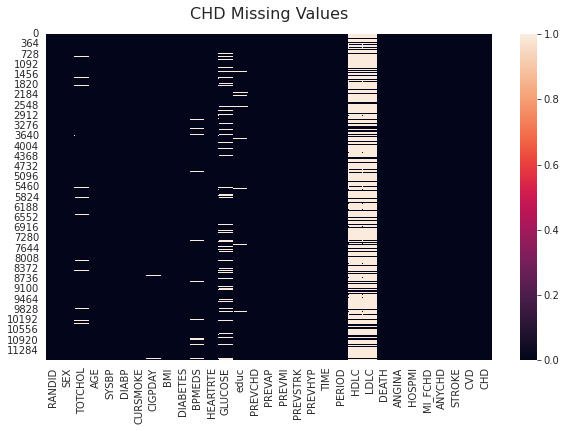

In [ ]:
# Examining missing values using a heatmap.
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
heatmap = sns.heatmap(heart_disease.isnull(), cbar = True)
heatmap.set_title('CHD Missing Values', fontdict = {'fontsize':16}, pad = 15)

In [ ]:
# Proportion of missing values for each field.
percent_missing = round(heart_disease.isnull().sum() * 100 / len(heart_disease),2)
percent_missing

RANDID       0.00
SEX          0.00
TOTCHOL      3.52
AGE          0.00
SYSBP        0.00
DIABP        0.00
CURSMOKE     0.00
CIGPDAY      0.68
BMI          0.45
DIABETES     0.00
BPMEDS       5.10
HEARTRTE     0.05
GLUCOSE     12.38
educ         2.54
PREVCHD      0.00
PREVAP       0.00
PREVMI       0.00
PREVSTRK     0.00
PREVHYP      0.00
TIME         0.00
PERIOD       0.00
HDLC        73.97
LDLC        73.97
DEATH        0.00
ANGINA       0.00
HOSPMI       0.00
MI_FCHD      0.00
ANYCHD       0.00
STROKE       0.00
CVD          0.00
CHD          0.00
dtype: float64

In [ ]:
heart_disease.drop(['RANDID', 'educ','TIME', 'PERIOD', 'HDLC', 'LDLC', 'DEATH', 'ANGINA', 'HOSPMI',
                    'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD'], axis = 1, inplace = True)
heart_disease.head()

SEX  TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY    BMI  DIABETES  \
0    1    195.0   39  106.0   70.0         0      0.0  26.97         0   
1    1    209.0   52  121.0   66.0         0      0.0    NaN         0   
2    2    250.0   46  121.0   81.0         0      0.0  28.73         0   
3    2    260.0   52  105.0   69.5         0      0.0  29.43         0   
4    2    237.0   58  108.0   66.0         0      0.0  28.50         0   

   BPMEDS  HEARTRTE  GLUCOSE  PREVCHD  PREVAP  PREVMI  PREVSTRK  PREVHYP  CHD  
0     0.0      80.0     77.0        0       0       0         0        0    1  
1     0.0      69.0     92.0        0       0       0         0        0    1  
2     0.0      95.0     76.0        0       0       0         0        0    0  
3     0.0      80.0     86.0        0       0       0         0        0    0  
4     0.0      80.0     71.0        0       0       0         0        0    0

I droped:
- RANDID: Unique identification number for each participant
- educ: education level
- TIME: Number of days since baseline exam
- PERIOD: Examination Cycle (1, 2, or 3)
- HDLC and LDLC: have almost 74% of missing data
- DEATH: Death from any cause
- ANGINA, HOSPMI, MI_FCHD, ANYCHD, STROKE and CVD: this columns represents if event (any kind of heart disease) did not occur during followup (0), or event did occur during the followup (1). It is repetitive informatoin which was summurised in the column CHD.

In [ ]:
heart_disease.describe().T

count        mean        std     min      25%     50%     75%  \
SEX       11627.0    1.568074   0.495366    1.00    1.000    2.00    2.00   
TOTCHOL   11218.0  241.162418  45.368030  107.00  210.000  238.00  268.00   
AGE       11627.0   54.792810   9.564299   32.00   48.000   54.00   62.00   
SYSBP     11627.0  136.324116  22.798625   83.50  120.000  132.00  149.00   
DIABP     11627.0   83.037757  11.660144   30.00   75.000   82.00   90.00   
CURSMOKE  11627.0    0.432528   0.495448    0.00    0.000    0.00    1.00   
CIGPDAY   11548.0    8.250346  12.186888    0.00    0.000    0.00   20.00   
BMI       11575.0   25.877349   4.102640   14.43   23.095   25.48   28.07   
DIABETES  11627.0    0.045584   0.208589    0.00    0.000    0.00    0.00   
BPMEDS    11034.0    0.085554   0.279717    0.00    0.000    0.00    0.00   
HEARTRTE  11621.0   76.781516  12.463359   37.00   69.000   75.00   85.00   
GLUCOSE   10187.0   84.124865  24.993781   39.00   72.000   80.00   89.00   
PREVCHD   11627.0    0.072418   0.259189    0.00    0.000    0.00    0.00   
PREVAP    11627.0    0.053926   0.225882    0.00    0.000    0.00    0.00   
PREVMI    11627.0    0.032167   0.176450    0.00    0.000    0.00    0.00   
PREVSTRK  11627.0    0.013073   0.113592    0.00    0.000    0.00    0.00   
PREVHYP   11627.0    0.459620   0.498388    0.00    0.000    0.00    1.00   
CHD       11627.0    0.323557   0.467853    0.00    0.000    0.00    1.00   

            max  
SEX         2.0  
TOTCHOL   696.0  
AGE        81.0  
SYSBP     295.0  
DIABP     150.0  
CURSMOKE    1.0  
CIGPDAY    90.0  
BMI        56.8  
DIABETES    1.0  
BPMEDS      1.0  
HEARTRTE  220.0  
GLUCOSE   478.0  
PREVCHD     1.0  
PREVAP      1.0  
PREVMI      1.0  
PREVSTRK    1.0  
PREVHYP     1.0  
CHD         1.0

In [ ]:
continious_var = ['TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'BMI', 'HEARTRTE', 'GLUCOSE']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

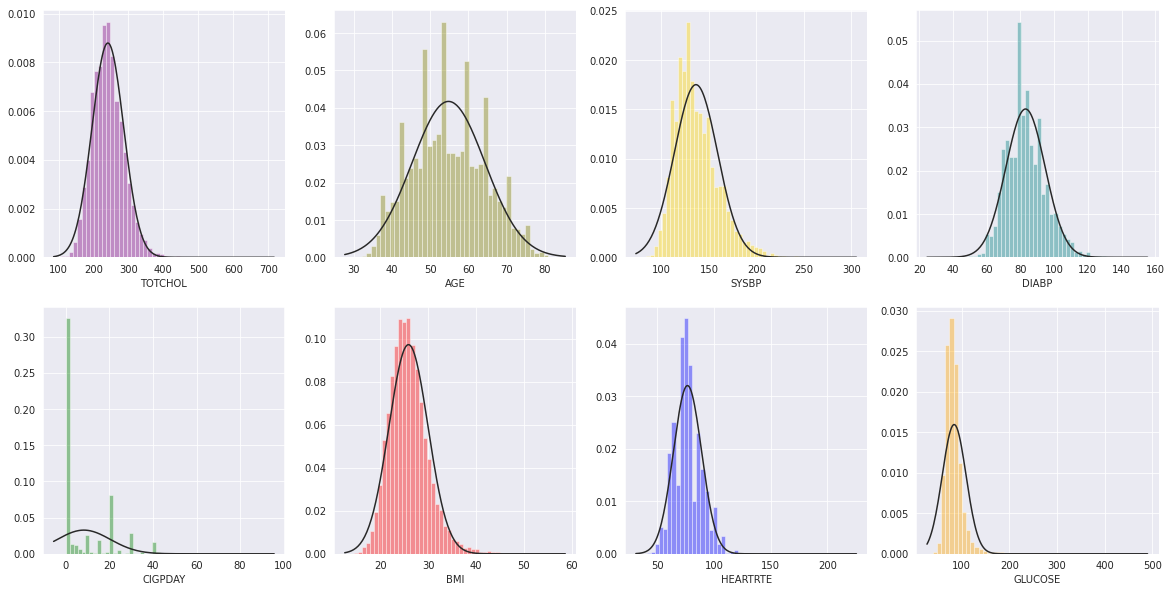

In [ ]:
# Checking data distribution using a histogram (bar graph).
from scipy.stats import norm
sns.set_style('darkgrid')
fig, axs = plt.subplots(2, 4, figsize = (20, 10))

sns.distplot(heart_disease['TOTCHOL'], fit = norm, kde = False, color ='purple', ax = axs[0, 0])
sns.distplot(heart_disease['AGE'], fit = norm, kde = False, color ='olive', ax = axs[0, 1])
sns.distplot(heart_disease['SYSBP'], fit = norm, kde = False, color ='gold', ax = axs[0, 2])
sns.distplot(heart_disease['DIABP'], fit = norm, kde = False, color ='teal', ax = axs[0, 3])
sns.distplot(heart_disease['CIGPDAY'], fit = norm, kde = False, color ='green', ax = axs[1, 0])
sns.distplot(heart_disease['BMI'], fit = norm, kde = False, color ='red', ax = axs[1, 1])
sns.distplot(heart_disease['HEARTRTE'], fit = norm, kde = False, color ='blue', ax = axs[1, 2])
sns.distplot(heart_disease['GLUCOSE'], fit = norm, kde = False, color ='orange', ax = axs[1, 3])

plt.show()

In [ ]:
# Checking data skewness.
heart_disease[continious_var].skew()

TOTCHOL     0.820446
AGE         0.142233
SYSBP       0.940597
DIABP       0.553652
CIGPDAY     1.507363
BMI         0.983355
HEARTRTE    0.677158
GLUCOSE     5.481135
dtype: float64

In [ ]:
binominal_var = ['SEX', 'CURSMOKE', 'DIABETES', 'BPMEDS', 'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

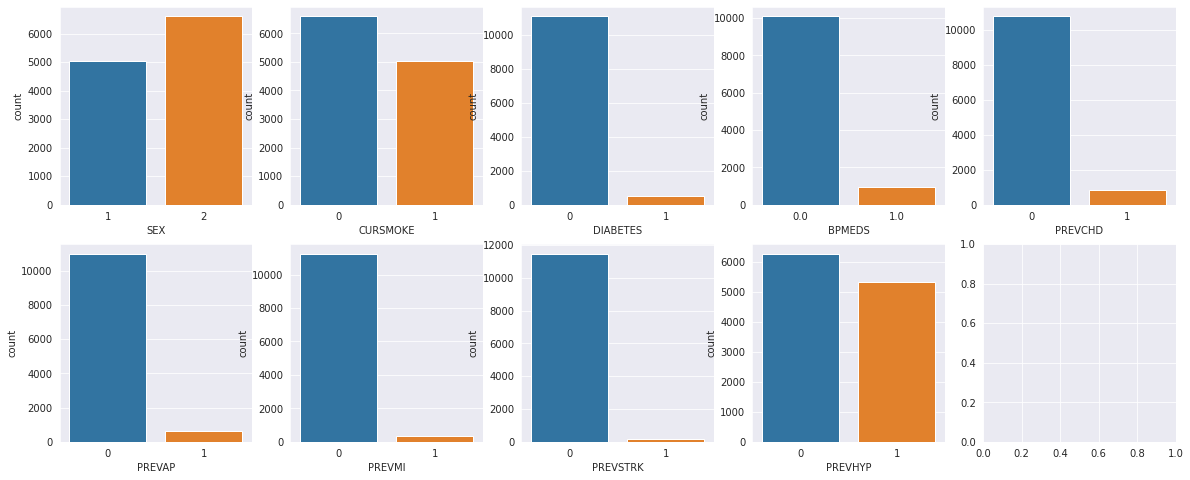

In [ ]:
# Checking data distribution using a histogram (bar graph) in nominal variables.
sns.set_style('darkgrid')
fig, axs = plt.subplots(2, 5, figsize = (20, 8))

sns.countplot(heart_disease['SEX'], ax = axs[0, 0])
sns.countplot(heart_disease['CURSMOKE'], ax = axs[0, 1])
sns.countplot(heart_disease['DIABETES'], ax = axs[0, 2])
sns.countplot(heart_disease['BPMEDS'], ax = axs[0, 3])
sns.countplot(heart_disease['PREVCHD'], ax = axs[0, 4])
sns.countplot(heart_disease['PREVAP'], ax = axs[1, 0])
sns.countplot(heart_disease['PREVMI'], ax = axs[1, 1])
sns.countplot(heart_disease['PREVSTRK'], ax = axs[1, 2])
sns.countplot(heart_disease['PREVHYP'], ax = axs[1, 3])

plt.show()

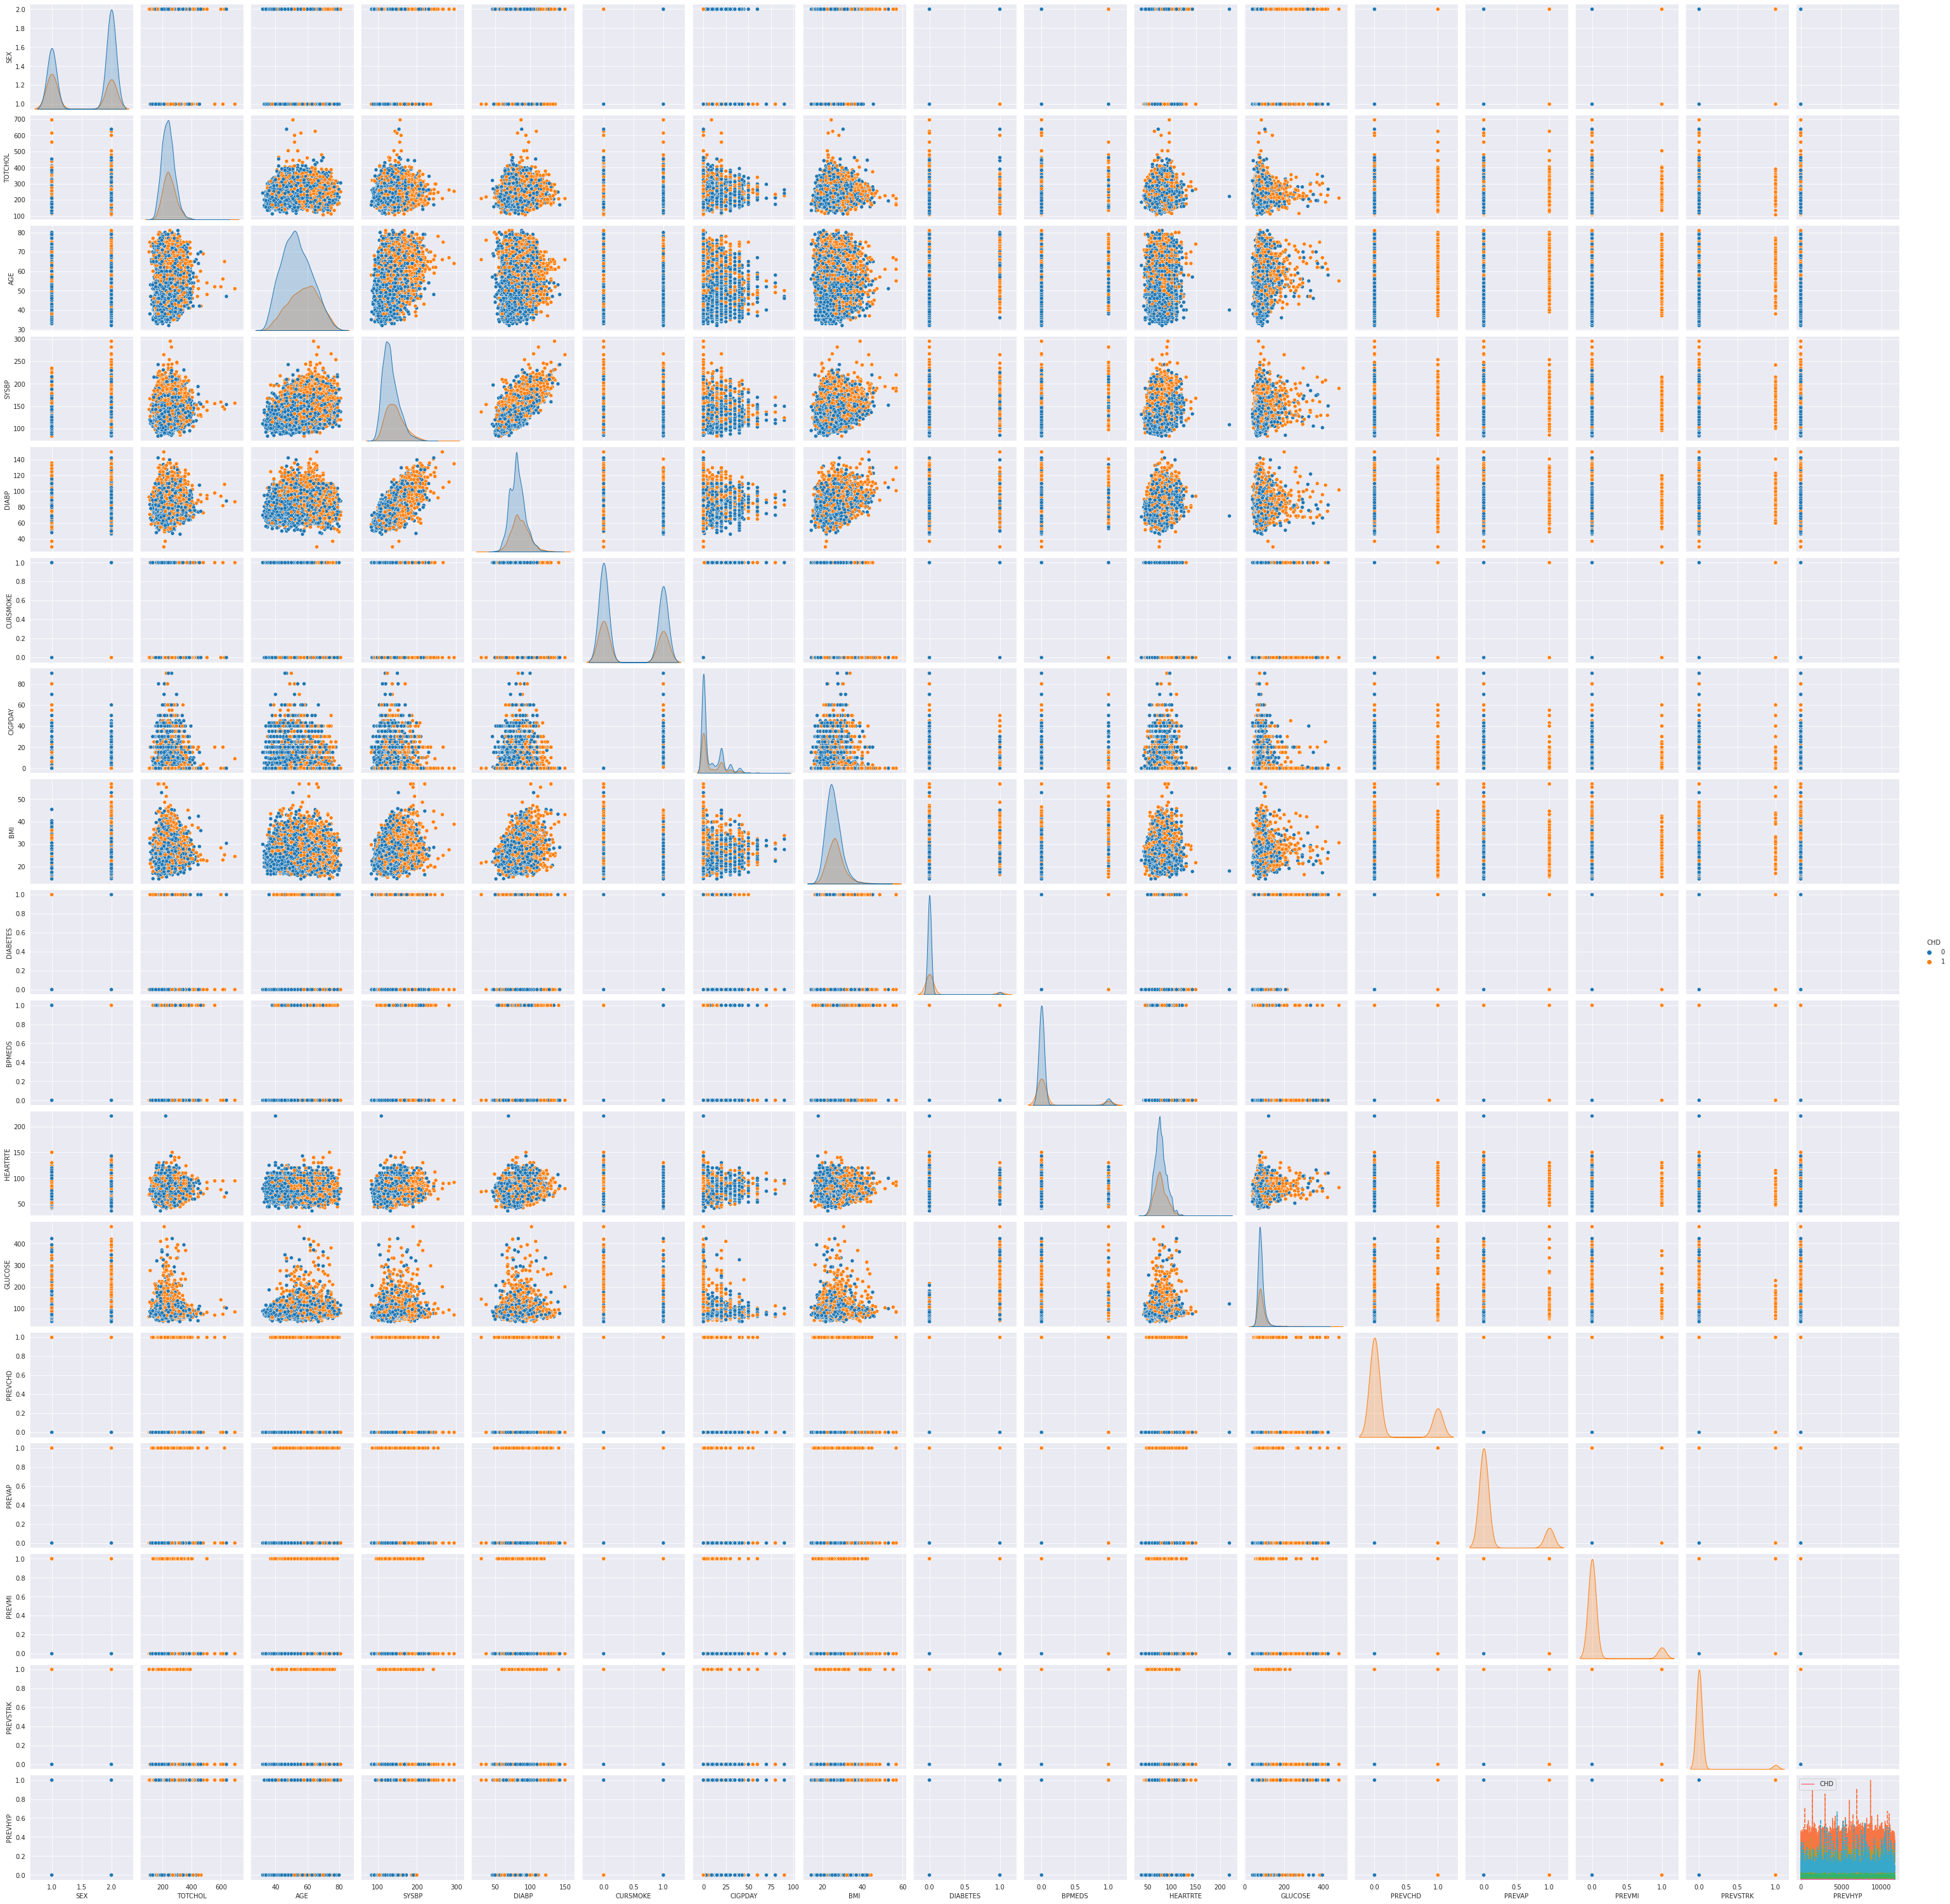

In [ ]:
# Building a pairplot to evaluate data distributions and correlations.
sns.set_style('darkgrid')
sns.pairplot(heart_disease, hue = 'CHD')
sns.lineplot(data = heart_disease)
plt.legend(labels = ['CHD'])

<ipython-input-23-e51549430600>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype = np.bool))


Text(0.5, 1.0, 'Risk of CHD Correlation Heatmap')

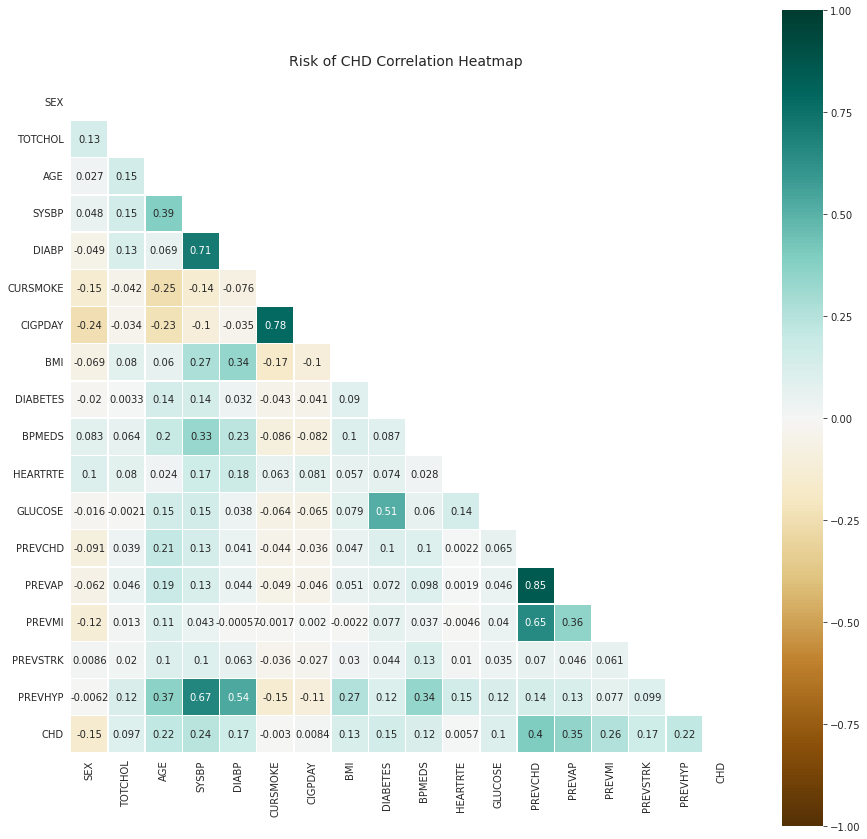

In [ ]:
# Checking correlation coefficient between variables.
import numpy as np
corr = heart_disease.corr()
plt.figure(figsize = (15, 15))
sns.set_style('white')
mask = np.triu(np.ones_like(corr, dtype = np.bool))
heatmap = sns.heatmap(corr, mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG', square = True, linewidth =.5)
heatmap.set_title('Risk of CHD Correlation Heatmap', fontdict = {'fontsize':14}, pad = 18)

In [ ]:
heart_disease.isnull().sum()

SEX            0
TOTCHOL      409
AGE            0
SYSBP          0
DIABP          0
CURSMOKE       0
CIGPDAY       79
BMI           52
DIABETES       0
BPMEDS       593
HEARTRTE       6
GLUCOSE     1440
PREVCHD        0
PREVAP         0
PREVMI         0
PREVSTRK       0
PREVHYP        0
CHD            0
dtype: int64

In [ ]:
# Imputing missing values with k = 3.
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 3)
heart_imputed = pd.DataFrame(imputer.fit_transform(heart_disease), columns = heart_disease.columns)

In [ ]:
heart_imputed.head()

SEX  TOTCHOL   AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY        BMI  DIABETES  \
0  1.0    195.0  39.0  106.0   70.0       0.0      0.0  26.970000       0.0   
1  1.0    209.0  52.0  121.0   66.0       0.0      0.0  25.056667       0.0   
2  2.0    250.0  46.0  121.0   81.0       0.0      0.0  28.730000       0.0   
3  2.0    260.0  52.0  105.0   69.5       0.0      0.0  29.430000       0.0   
4  2.0    237.0  58.0  108.0   66.0       0.0      0.0  28.500000       0.0   

   BPMEDS  HEARTRTE  GLUCOSE  PREVCHD  PREVAP  PREVMI  PREVSTRK  PREVHYP  CHD  
0     0.0      80.0     77.0      0.0     0.0     0.0       0.0      0.0  1.0  
1     0.0      69.0     92.0      0.0     0.0     0.0       0.0      0.0  1.0  
2     0.0      95.0     76.0      0.0     0.0     0.0       0.0      0.0  0.0  
3     0.0      80.0     86.0      0.0     0.0     0.0       0.0      0.0  0.0  
4     0.0      80.0     71.0      0.0     0.0     0.0       0.0      0.0  0.0

In [ ]:
# Cheking forf missing values afrer imputation.
heart_imputed.isnull().sum()

SEX         0
TOTCHOL     0
AGE         0
SYSBP       0
DIABP       0
CURSMOKE    0
CIGPDAY     0
BMI         0
DIABETES    0
BPMEDS      0
HEARTRTE    0
GLUCOSE     0
PREVCHD     0
PREVAP      0
PREVMI      0
PREVSTRK    0
PREVHYP     0
CHD         0
dtype: int64

In [ ]:
heart_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       11627 non-null  float64
 1   TOTCHOL   11627 non-null  float64
 2   AGE       11627 non-null  float64
 3   SYSBP     11627 non-null  float64
 4   DIABP     11627 non-null  float64
 5   CURSMOKE  11627 non-null  float64
 6   CIGPDAY   11627 non-null  float64
 7   BMI       11627 non-null  float64
 8   DIABETES  11627 non-null  float64
 9   BPMEDS    11627 non-null  float64
 10  HEARTRTE  11627 non-null  float64
 11  GLUCOSE   11627 non-null  float64
 12  PREVCHD   11627 non-null  float64
 13  PREVAP    11627 non-null  float64
 14  PREVMI    11627 non-null  float64
 15  PREVSTRK  11627 non-null  float64
 16  PREVHYP   11627 non-null  float64
 17  CHD       11627 non-null  float64
dtypes: float64(18)
memory usage: 1.6 MB


In [ ]:
heart_imputed.describe().T

count        mean        std     min    25%         50%     75%  \
SEX       11627.0    1.568074   0.495366    1.00    1.0    2.000000    2.00   
TOTCHOL   11627.0  241.243972  44.845940  107.00  210.0  238.666667  268.00   
AGE       11627.0   54.792810   9.564299   32.00   48.0   54.000000   62.00   
SYSBP     11627.0  136.324116  22.798625   83.50  120.0  132.000000  149.00   
DIABP     11627.0   83.037757  11.660144   30.00   75.0   82.000000   90.00   
CURSMOKE  11627.0    0.432528   0.495448    0.00    0.0    0.000000    1.00   
CIGPDAY   11627.0    8.247413  12.160767    0.00    0.0    0.000000   20.00   
BMI       11627.0   25.878834   4.097262   14.43   23.1   25.480000   28.06   
DIABETES  11627.0    0.045584   0.208589    0.00    0.0    0.000000    0.00   
BPMEDS    11627.0    0.086981   0.276514    0.00    0.0    0.000000    0.00   
HEARTRTE  11627.0   76.783550  12.463909   37.00   69.0   75.000000   85.00   
GLUCOSE   11627.0   84.205843  23.958582   39.00   73.0   80.000000   89.00   
PREVCHD   11627.0    0.072418   0.259189    0.00    0.0    0.000000    0.00   
PREVAP    11627.0    0.053926   0.225882    0.00    0.0    0.000000    0.00   
PREVMI    11627.0    0.032167   0.176450    0.00    0.0    0.000000    0.00   
PREVSTRK  11627.0    0.013073   0.113592    0.00    0.0    0.000000    0.00   
PREVHYP   11627.0    0.459620   0.498388    0.00    0.0    0.000000    1.00   
CHD       11627.0    0.323557   0.467853    0.00    0.0    0.000000    1.00   

            max  
SEX         2.0  
TOTCHOL   696.0  
AGE        81.0  
SYSBP     295.0  
DIABP     150.0  
CURSMOKE    1.0  
CIGPDAY    90.0  
BMI        56.8  
DIABETES    1.0  
BPMEDS      1.0  
HEARTRTE  220.0  
GLUCOSE   478.0  
PREVCHD     1.0  
PREVAP      1.0  
PREVMI      1.0  
PREVSTRK    1.0  
PREVHYP     1.0  
CHD         1.0

**Logistic** **Model**

In [ ]:
# Spliting data 70/30 into training and test datasets.
X = heart_imputed.drop('CHD', axis = 1)
y = heart_imputed['CHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
# Sanity check for the sampled data.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8138, 17)
(8138,)
(3489, 17)
(3489,)


In [ ]:
# Building a logistic regression model to predict heart disease.
logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_train, y_train)

y_pred_l = logmodel.predict(X_test)

In [ ]:
# Displaying the confusion matrix Logistic Regression.
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_l))

[[2300   67]
 [ 723  399]]


In [ ]:
# Reporting the following metrics (Logistic model):
# ROC AUC
# Accuracy
# Recall
# Precision
# Display the ROC curve

target_names = ['No risk of Heart disease', 'At risk of Heart disease']
print(classification_report(y_test, y_pred_l, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.76      0.97      0.85      2367
At risk of Heart disease       0.86      0.36      0.50      1122

                accuracy                           0.77      3489
               macro avg       0.81      0.66      0.68      3489
            weighted avg       0.79      0.77      0.74      3489



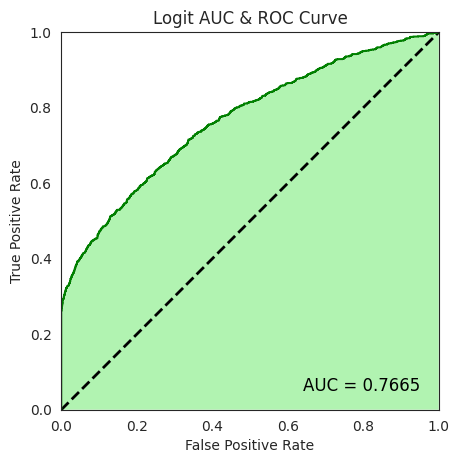

In [ ]:
# AUC and ROC (Logistic model).
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure(figsize = (5, 5), dpi = 100)
lw = 2
plt.axis('scaled')
plt.plot([0, 1], [0, 1],color = 'black', lw = lw, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Logit AUC & ROC Curve')
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'lightgreen', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % logit_roc_auc, ha ='right', fontsize = 12, color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Calculating the g-mean for each threshold
import numpy as np
from numpy import sqrt
from numpy import argmax
gmeans_l = sqrt(tpr * (1 - fpr))

# Locating the index of the largest g-mean
ix_l = argmax(gmeans_l)

print('Best Threshold = %f, G-Mean = %.3f' % (thresholds[ix_l], gmeans_l[ix_l]))

Best Threshold = 0.303191, G-Mean = 0.689


In [ ]:
from scipy.special import logit
y_proba_l = logmodel.predict_proba(X_test)[:,1]

In [ ]:
# Applying threshold to positive probabilities to create labels.
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

In [ ]:
from sklearn.metrics import f1_score
from numpy import arange

# Defing thresholds.
thresholds = arange(0, 1, 0.001)

# Evaluating each threshold.
scores_l = [f1_score(y_test, to_labels(y_proba_l, t)) for t in thresholds]

# Getting best threshold.
ix_l = argmax(scores_l)
print('Optimal Threshold = %.3f, F-Score = %.5f' % (thresholds[ix_l], scores_l[ix_l]))

Optimal Threshold = 0.272, F-Score = 0.58914


In [ ]:
# Applying optimal threshold.
threshold = 0.272
y_pred_l_t = (logmodel.predict_proba(X_test)[:, 1] > threshold).astype('float')
confusion_matrix(y_test, y_pred_l_t)

array([[1566,  801],
       [ 319,  803]])

In [ ]:
print(classification_report(y_test, y_pred_l_t, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.83      0.66      0.74      2367
At risk of Heart disease       0.50      0.72      0.59      1122

                accuracy                           0.68      3489
               macro avg       0.67      0.69      0.66      3489
            weighted avg       0.72      0.68      0.69      3489



**kNN** **Model**

**k** = **5**

In [ ]:
# Building a kNN model.
# Rescaling the data for analysis.
# MinMax Scaler transforms features into [0,1]
# Formula: X_rescaled = (Xi - Xmin) / (Xmax-Xmin)

from sklearn.preprocessing import MinMaxScaler

X_knn = heart_imputed.drop('CHD', axis=1)
y_knn = heart_imputed['CHD']

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X_knn)
X_rescaled = pd.DataFrame(X_, columns = X_knn.columns)

In [ ]:
X_rescaled.describe()

SEX       TOTCHOL           AGE         SYSBP         DIABP  \
count  11627.000000  11627.000000  11627.000000  11627.000000  11627.000000   
mean       0.568074      0.227918      0.465159      0.249759      0.441981   
std        0.495366      0.076139      0.195190      0.107795      0.097168   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.174873      0.326531      0.172577      0.375000   
50%        1.000000      0.223543      0.448980      0.229314      0.433333   
75%        1.000000      0.273345      0.612245      0.309693      0.500000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           CURSMOKE       CIGPDAY           BMI      DIABETES        BPMEDS  \
count  11627.000000  11627.000000  11627.000000  11627.000000  11627.000000   
mean       0.432528      0.091638      0.270211      0.045584      0.086981   
std        0.495448      0.135120      0.096702      0.208589      0.276514   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.204626      0.000000      0.000000   
50%        0.000000      0.000000      0.260798      0.000000      0.000000   
75%        1.000000      0.222222      0.321690      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           HEARTRTE       GLUCOSE       PREVCHD        PREVAP        PREVMI  \
count  11627.000000  11627.000000  11627.000000  11627.000000  11627.000000   
mean       0.217396      0.102975      0.072418      0.053926      0.032167   
std        0.068109      0.054575      0.259189      0.225882      0.176450   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.174863      0.077449      0.000000      0.000000      0.000000   
50%        0.207650      0.093394      0.000000      0.000000      0.000000   
75%        0.262295      0.113895      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           PREVSTRK       PREVHYP  
count  11627.000000  11627.000000  
mean       0.013073      0.459620  
std        0.113592      0.498388  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      1.000000  
max        1.000000      1.000000

In [ ]:
# Splitting data on training and testing.
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_rescaled, y_knn, test_size = 0.3, random_state = 1)

In [ ]:
# Developing a kNN model to predict heart disease using k = 5.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(X_knn_train, y_knn_train)

y_knn_pred = knn.predict(X_knn_test)

In [ ]:
# Displaying the confusion matrix (kNN model k = 5).
print(confusion_matrix(y_knn_test, y_knn_pred))

[[2079  288]
 [ 625  497]]


In [ ]:
# kNN classification report (k = 5).
print(classification_report(y_knn_test, y_knn_pred, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.77      0.88      0.82      2367
At risk of Heart disease       0.63      0.44      0.52      1122

                accuracy                           0.74      3489
               macro avg       0.70      0.66      0.67      3489
            weighted avg       0.73      0.74      0.72      3489



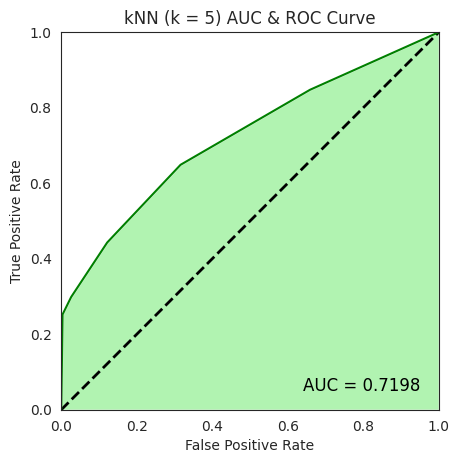

In [ ]:
# kNN (k = 5) AUC and ROC curve.
knn_roc_auc = roc_auc_score(y_knn_test, knn.predict_proba(X_knn_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_knn_test, knn.predict_proba(X_knn_test)[:,1])
plt.figure(figsize = (5, 5), dpi = 100)
lw = 2
plt.axis('scaled')
plt.plot([0, 1], [0, 1],color = 'black', lw = lw, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('kNN (k = 5) AUC & ROC Curve')
plt.plot(fpr, tpr, 'green')
plt.fill_between(fpr, tpr, facecolor = 'lightgreen', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % knn_roc_auc, ha ='right', fontsize = 12, color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Calculating the g-mean for each threshold
gmeans_k = sqrt(tpr * (1 - fpr))

# Locating the index of the largest g-mean
ix_k = argmax(gmeans_k)

print('Best Threshold = %f, G-Mean = %.3f' % (thresholds[ix_k], gmeans_k[ix_k]))

Best Threshold = 0.400000, G-Mean = 0.666


In [ ]:
y_proba_knn = knn.predict_proba(X_knn_test)[:,1]

In [ ]:
# Defing thresholds.
thresholds = arange(0, 1, 0.001)

# Evaluating each threshold.
scores_k = [f1_score(y_knn_test, to_labels(y_proba_knn, t)) for t in thresholds]

# Getting optimal threshold.
ix_k = argmax(scores_k)
print('Optimal Threshold = %.3f, F-Score = %.5f' % (thresholds[ix_k], scores_k[ix_k]))

Optimal Threshold = 0.201, F-Score = 0.56043


In [ ]:
# Applying optimal threshold.
threshold = 0.201
y_pred_knn_t = (knn.predict_proba(X_knn_test)[:,1] > threshold).astype('float')
confusion_matrix(y_knn_test, y_pred_knn_t)

array([[1619,  748],
       [ 394,  728]])

In [ ]:
print(classification_report(y_knn_test, y_pred_knn_t, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.80      0.68      0.74      2367
At risk of Heart disease       0.49      0.65      0.56      1122

                accuracy                           0.67      3489
               macro avg       0.65      0.67      0.65      3489
            weighted avg       0.70      0.67      0.68      3489



**Optimal** **k**

In [ ]:
# Determining the optimal value of k based on the ROC AUC.
print('ROC AUC: ', roc_auc_score(y_knn_test, knn.predict_proba(X_knn_test)[:,1]))

ROC AUC:  0.7198328999380219


In [ ]:
from sklearn.model_selection import cross_val_score
max_K = 100
cv_scores = [ ]

for K in range(1, max_K):
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn, X_knn_train, y_knn_train.values.ravel(), cv = 5, scoring = "roc_auc")
    cv_scores.append(scores.mean())

In [ ]:
# Finding th optimal k.
print('Optimal k: ', cv_scores.index(max(cv_scores)) + 1)

Optimal k:  91


In [ ]:
# Developing a kNN model to predict diabetes occurence using optimazed value of k = 91.
knn_2 = KNeighborsClassifier(n_neighbors = 91, metric = 'euclidean')
knn_2.fit(X_knn_train, y_knn_train)

y_pred_knn = knn_2.predict(X_knn_test)

In [ ]:
# Displaying the confusion matrix (kNN model k = 98).
print(confusion_matrix(y_knn_test, y_pred_knn))

[[2350   17]
 [ 826  296]]


In [ ]:
# kNN classification report (k = 91).
print(classification_report(y_knn_test, y_pred_knn, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.74      0.99      0.85      2367
At risk of Heart disease       0.95      0.26      0.41      1122

                accuracy                           0.76      3489
               macro avg       0.84      0.63      0.63      3489
            weighted avg       0.81      0.76      0.71      3489



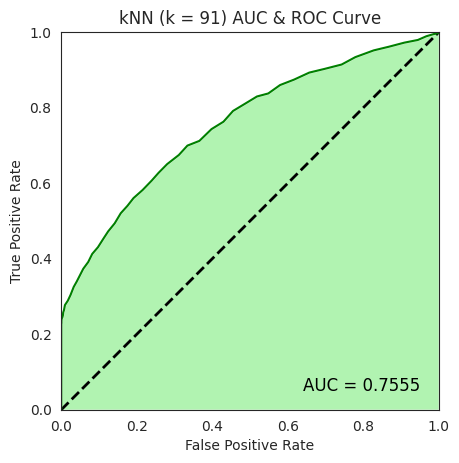

In [ ]:
# kNN (k = 91) AUC and ROC curve.
knn_roc_auc = roc_auc_score(y_knn_test, knn_2.predict_proba(X_knn_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_knn_test, knn_2.predict_proba(X_knn_test)[:,1])
plt.figure(figsize = (5, 5), dpi = 100)
lw = 2
plt.axis('scaled')
plt.plot([0, 1], [0, 1],color = 'black', lw = lw, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('kNN (k = 91) AUC & ROC Curve')
plt.plot(fpr, tpr, 'green')
plt.fill_between(fpr, tpr, facecolor = 'lightgreen', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % knn_roc_auc, ha ='right', fontsize = 12, color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Calculating the g-mean for each threshold
gmeans_k_o = sqrt(tpr * (1 - fpr))

# Locating the index of the largest g-mean
ix_k_o = argmax(gmeans_k_o)

print('Best Threshold = %f, G-Mean = %.3f' % (thresholds[ix_k_o], gmeans_k_o[ix_k_o]))

Best Threshold = 0.296703, G-Mean = 0.684


In [ ]:
y_proba_knn_2 = knn_2.predict_proba(X_knn_test)[:,1]

In [ ]:
# Defing thresholds.
thresholds = arange(0, 1, 0.001)

# Evaluating each threshold.
scores_k_o = [f1_score(y_knn_test, to_labels(y_proba_knn_2, t)) for t in thresholds]

# Getting best threshold.
ix_k_o = argmax(scores_k_o)
print('Optimal Threshold = %.3f, F-Score = %.5f' % (thresholds[ix_k_o], scores_k_o[ix_k_o]))

Optimal Threshold = 0.264, F-Score = 0.58191


In [ ]:
# Applying optimal threshold.
threshold = 0.264
y_pred_knn_t_2 = (knn_2.predict_proba(X_knn_test)[:,1] > threshold).astype('float')
confusion_matrix(y_knn_test, y_pred_knn_t_2)

array([[1576,  791],
       [ 337,  785]])

In [ ]:
print(classification_report(y_knn_test, y_pred_knn_t_2, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.82      0.67      0.74      2367
At risk of Heart disease       0.50      0.70      0.58      1122

                accuracy                           0.68      3489
               macro avg       0.66      0.68      0.66      3489
            weighted avg       0.72      0.68      0.69      3489



**Boosted** **Tree** **Model**

In [ ]:
# Building Boosted Tree model.
from sklearn.ensemble import AdaBoostClassifier
bt_model = AdaBoostClassifier(n_estimators = 100)
bt_model.fit(X_train, y_train)

y_pred_bt = bt_model.predict(X_test)

In [ ]:
# Displaying the confusion matrix (Boosted Tree).
print(confusion_matrix(y_test, y_pred_bt))

[[2269   98]
 [ 701  421]]


In [ ]:
# Boosted Tree classification report.
print(classification_report(y_test, y_pred_bt, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.76      0.96      0.85      2367
At risk of Heart disease       0.81      0.38      0.51      1122

                accuracy                           0.77      3489
               macro avg       0.79      0.67      0.68      3489
            weighted avg       0.78      0.77      0.74      3489



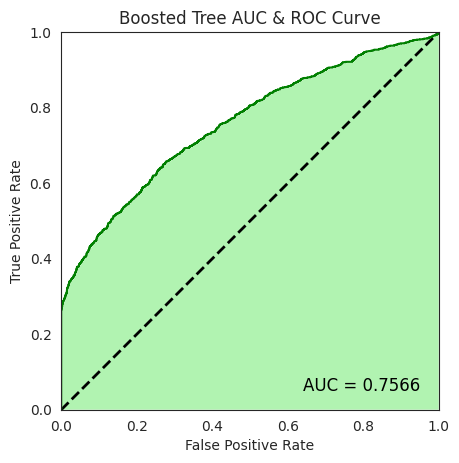

In [ ]:
# AUC and ROC curve Boosted Tree.
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (5, 5), dpi = 100)
lw = 2
plt.axis('scaled')
plt.plot([0, 1], [0, 1],color = 'black', lw = lw, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Boosted Tree AUC & ROC Curve')
plt.plot(fpr, tpr, 'green')
plt.fill_between(fpr, tpr, facecolor = 'lightgreen', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % bt_roc_auc, ha ='right', fontsize = 12, color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Calculating the g-mean for each threshold
gmeans_bt = sqrt(tpr * (1 - fpr))

# Locating the index of the largest g-mean
ix_bt = argmax(gmeans_bt)

print('Best Threshold = %f, G-Mean = %.3f' % (thresholds[ix_bt], gmeans_bt[ix_bt]))

Best Threshold = 0.497792, G-Mean = 0.689


In [ ]:
y_proba_bt = bt_model.predict_proba(X_test)[:,1]

In [ ]:
# Defing thresholds.
thresholds = arange(0, 1, 0.001)

# Evaluating each threshold.
scores_bt = [f1_score(y_test, to_labels(y_proba_bt, t)) for t in thresholds]

# Getting best threshold.
ix_bt = argmax(scores_bt)
print('Optimal Threshold = %.3f, F-Score = %.5f' % (thresholds[ix_bt], scores_bt[ix_bt]))

Optimal Threshold = 0.498, F-Score = 0.57921


In [ ]:
# Applying optimal threshold.
threshold = 0.498
y_pred_bt_2 = (bt_model.predict_proba(X_test)[:,1] > threshold).astype('float')
confusion_matrix(y_test, y_pred_bt_2)

array([[1794,  573],
       [ 431,  691]])

In [ ]:
print(classification_report(y_test, y_pred_bt_2, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.81      0.76      0.78      2367
At risk of Heart disease       0.55      0.62      0.58      1122

                accuracy                           0.71      3489
               macro avg       0.68      0.69      0.68      3489
            weighted avg       0.72      0.71      0.72      3489



**Random** **Forest** **Model**

In [ ]:
# Random Forest model.
from sklearn.ensemble import RandomForestClassifier
rf_model  = RandomForestClassifier(max_depth = 5, random_state = 0)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Displaying the confusion matrix (Random Forest).
print(confusion_matrix(y_test, y_pred_rf))

[[2363    4]
 [ 821  301]]


In [ ]:
# Random Forest classification report.
print(classification_report(y_test, y_pred_rf, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.74      1.00      0.85      2367
At risk of Heart disease       0.99      0.27      0.42      1122

                accuracy                           0.76      3489
               macro avg       0.86      0.63      0.64      3489
            weighted avg       0.82      0.76      0.71      3489



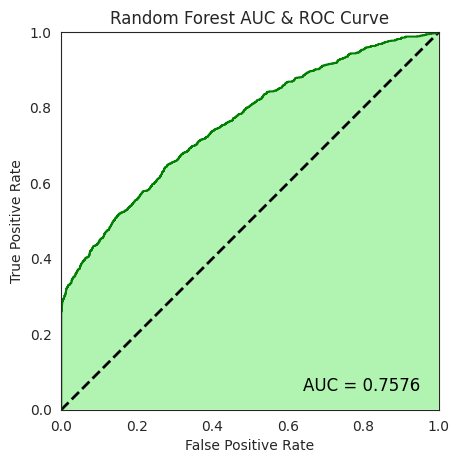

In [ ]:
# AUC and ROC curve Random Forest.
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (5, 5), dpi = 100)
lw = 2
plt.axis('scaled')
plt.plot([0, 1], [0, 1],color = 'black', lw = lw, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Random Forest AUC & ROC Curve')
plt.plot(fpr, tpr, 'green')
plt.fill_between(fpr, tpr, facecolor = 'lightgreen', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % rf_roc_auc, ha ='right', fontsize = 12, color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Calculating the g-mean for each threshold
gmeans_rf = sqrt(tpr * (1 - fpr))

# Locating the index of the largest g-mean
ix_rf = argmax(gmeans_rf)

print('Best Threshold = %f, G-Mean = %.3f' % (thresholds[ix_rf], gmeans_rf[ix_rf]))

Best Threshold = 0.305929, G-Mean = 0.683


In [ ]:
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

In [ ]:
# Defing thresholds.
thresholds = arange(0, 1, 0.001)

# Evaluating each threshold.
scores_rf = [f1_score(y_test, to_labels(y_proba_rf, t)) for t in thresholds]

# Getting best threshold.
ix_rf = argmax(scores_rf)
print('Optimal Threshold = %.3f, F-Score = %.5f' % (thresholds[ix_rf], scores_rf[ix_rf]))

Optimal Threshold = 0.306, F-Score = 0.57836


In [ ]:
# Applying optimal threshold.
threshold = 0.306
y_pred_rf_2 = (rf_model.predict_proba(X_test)[:,1] > threshold).astype('float')
confusion_matrix(y_test, y_pred_rf_2)

array([[1702,  665],
       [ 395,  727]])

In [ ]:
print(classification_report(y_test, y_pred_rf_2, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.81      0.72      0.76      2367
At risk of Heart disease       0.52      0.65      0.58      1122

                accuracy                           0.70      3489
               macro avg       0.67      0.68      0.67      3489
            weighted avg       0.72      0.70      0.70      3489



**XGBoost** **Model**

In [ ]:
# XGBoost model.
import xgboost as xgb

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)

In [ ]:
# Displaying the confusion matrix (Random Forest).
print(confusion_matrix(y_test, preds))

[[2350   17]
 [ 797  325]]


In [ ]:
# XGBoost classification report.
print(classification_report(y_test, preds, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.75      0.99      0.85      2367
At risk of Heart disease       0.95      0.29      0.44      1122

                accuracy                           0.77      3489
               macro avg       0.85      0.64      0.65      3489
            weighted avg       0.81      0.77      0.72      3489



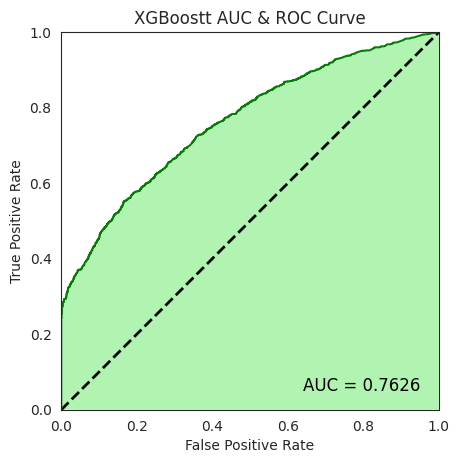

In [ ]:
# AUC and ROC curve XGBoost.
xg_roc_auc = roc_auc_score(y_test, xg_reg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, xg_reg.predict_proba(X_test)[:,1])
plt.figure(figsize = (5, 5), dpi = 100)
lw = 2
plt.axis('scaled')
plt.plot([0, 1], [0, 1],color = 'black', lw = lw, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('XGBoostt AUC & ROC Curve')
plt.plot(fpr, tpr, 'green')
plt.fill_between(fpr, tpr, facecolor = 'lightgreen', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % xg_roc_auc, ha ='right', fontsize = 12, color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Calculating the g-mean for each threshold
gmeans_xg = sqrt(tpr * (1 - fpr))

# Locating the index of the largest g-mean
ix_xg = argmax(gmeans_xg)

print('Best Threshold = %f, G-Mean = %.3f' % (thresholds[ix_xg], gmeans_xg[ix_xg]))

Best Threshold = 0.375057, G-Mean = 0.685


In [ ]:
y_proba_xg = xg_reg.predict_proba(X_test)[:,1]

In [ ]:
# Defing thresholds.
thresholds = arange(0, 1, 0.001)

# Evaluating each threshold.
scores_xg = [f1_score(y_test, to_labels(y_proba_xg, t)) for t in thresholds]

# Getting best threshold.
ix_xg = argmax(scores_xg)
print('Optimal Threshold = %.3f, F-Score = %.5f' % (thresholds[ix_xg], scores_xg[ix_xg]))

Optimal Threshold = 0.365, F-Score = 0.58336


In [ ]:
# Applying optimal threshold.
threshold = 0.365
y_pred_xg = (xg_reg.predict_proba(X_test)[:,1] > threshold).astype('float')
confusion_matrix(y_test, y_pred_xg)

array([[1522,  845],
       [ 312,  810]])

In [ ]:
print(classification_report(y_test, y_pred_xg, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.83      0.64      0.72      2367
At risk of Heart disease       0.49      0.72      0.58      1122

                accuracy                           0.67      3489
               macro avg       0.66      0.68      0.65      3489
            weighted avg       0.72      0.67      0.68      3489



**ANN** **Model**

- **activation** **function**: '**logistic**'
- **solver**: '**adam**'

In [ ]:
# Building a ANN model.
# Rescaling the data for analysis.
# MinMax Scaler transforms features into [0,1]
# Formula: X_rescaled = (Xi - Xmin) / (Xmax-Xmin)

X_ann = heart_imputed.drop('CHD', axis=1)
y_ann = heart_imputed['CHD']

scaler = MinMaxScaler()
X_a = scaler.fit_transform(X_ann)
X_a_rescaled = pd.DataFrame(X_a, columns = X_ann.columns)

In [ ]:
X_a_rescaled.describe()

SEX       TOTCHOL           AGE         SYSBP         DIABP  \
count  11627.000000  11627.000000  11627.000000  11627.000000  11627.000000   
mean       0.568074      0.227918      0.465159      0.249759      0.441981   
std        0.495366      0.076139      0.195190      0.107795      0.097168   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.174873      0.326531      0.172577      0.375000   
50%        1.000000      0.223543      0.448980      0.229314      0.433333   
75%        1.000000      0.273345      0.612245      0.309693      0.500000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           CURSMOKE       CIGPDAY           BMI      DIABETES        BPMEDS  \
count  11627.000000  11627.000000  11627.000000  11627.000000  11627.000000   
mean       0.432528      0.091638      0.270211      0.045584      0.086981   
std        0.495448      0.135120      0.096702      0.208589      0.276514   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.204626      0.000000      0.000000   
50%        0.000000      0.000000      0.260798      0.000000      0.000000   
75%        1.000000      0.222222      0.321690      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           HEARTRTE       GLUCOSE       PREVCHD        PREVAP        PREVMI  \
count  11627.000000  11627.000000  11627.000000  11627.000000  11627.000000   
mean       0.217396      0.102975      0.072418      0.053926      0.032167   
std        0.068109      0.054575      0.259189      0.225882      0.176450   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.174863      0.077449      0.000000      0.000000      0.000000   
50%        0.207650      0.093394      0.000000      0.000000      0.000000   
75%        0.262295      0.113895      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           PREVSTRK       PREVHYP  
count  11627.000000  11627.000000  
mean       0.013073      0.459620  
std        0.113592      0.498388  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      1.000000  
max        1.000000      1.000000

In [ ]:
# Splitting data on training and testing.
X_ann_train, X_ann_test, y_ann_train, y_ann_test = train_test_split(X_a_rescaled, y_ann, test_size = 0.3, random_state = 1)

In [ ]:
# ANN model (MLPClassifier) with a single hidden layer with 65 nodes.
# activation: 'logistic'
# solver: 'adam'

from sklearn.neural_network import MLPClassifier

MLPC_model = MLPClassifier(hidden_layer_sizes = 65, activation = 'logistic', solver = 'adam', random_state = 1)
MLPC_model.fit(X_ann_train, y_ann_train)

y_pred_mlpc = MLPC_model.predict(X_ann_test)

In [ ]:
# Displaying the confusion matrix (ANN model).
print(confusion_matrix(y_ann_test, y_pred_mlpc))

[[2302   65]
 [ 728  394]]


In [ ]:
# Classification report (ANN model).
print(classification_report(y_ann_test, y_pred_mlpc, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.76      0.97      0.85      2367
At risk of Heart disease       0.86      0.35      0.50      1122

                accuracy                           0.77      3489
               macro avg       0.81      0.66      0.68      3489
            weighted avg       0.79      0.77      0.74      3489



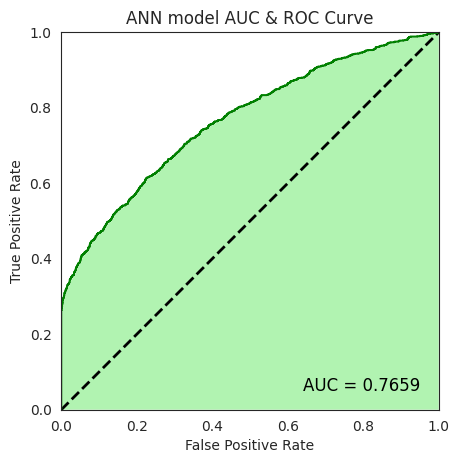

In [ ]:
# ANN model AUC and ROC curve.
ann_roc_auc = roc_auc_score(y_ann_test, MLPC_model.predict_proba(X_ann_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_ann_test, MLPC_model.predict_proba(X_ann_test)[:,1])
plt.figure(figsize = (5, 5), dpi = 100)
lw = 2
plt.axis('scaled')
plt.plot([0, 1], [0, 1],color = 'black', lw = lw, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ANN model AUC & ROC Curve')
plt.plot(fpr, tpr, 'green')
plt.fill_between(fpr, tpr, facecolor = 'lightgreen', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % ann_roc_auc, ha ='right', fontsize = 12, color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Calculating the g-mean for each threshold
gmeans_a = sqrt(tpr * (1 - fpr))

# Locating the index of the largest g-mean
ix_a = argmax(gmeans_a)

print('Best Threshold = %f, G-Mean = %.3f' % (thresholds[ix_a], gmeans_a[ix_a]))

Best Threshold = 0.285163, G-Mean = 0.690


In [ ]:
y_proba_a = MLPC_model.predict_proba(X_ann_test)[:,1]

In [ ]:
# Defing thresholds.
thresholds = arange(0, 1, 0.001)

# Evaluating each threshold.
scores_a = [f1_score(y_ann_test, to_labels(y_proba_a, t)) for t in thresholds]

# Getting best threshold.
ix_a = argmax(scores_a)
print('Optimal Threshold = %.3f, F-Score = %.5f' % (thresholds[ix_a], scores_a[ix_a]))

Optimal Threshold = 0.262, F-Score = 0.58789


In [ ]:
# Applying optimal threshold.
threshold = 0.262
y_pred_a = (MLPC_model.predict_proba(X_ann_test)[:,1] > threshold).astype('float')
confusion_matrix(y_ann_test, y_pred_a)

array([[1553,  814],
       [ 316,  806]])

In [ ]:
print(classification_report(y_ann_test, y_pred_a, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.83      0.66      0.73      2367
At risk of Heart disease       0.50      0.72      0.59      1122

                accuracy                           0.68      3489
               macro avg       0.66      0.69      0.66      3489
            weighted avg       0.72      0.68      0.69      3489



- **activation** **function**: '**relu**'
- **solver**: '**adam**'

In [ ]:
# ANN model (MLPClassifier) with a single hidden layer with 65 nodes.
# activation: 'relu'
# solver: 'adam'

MLPC_model_2 = MLPClassifier(hidden_layer_sizes = 65, activation = 'relu', solver = 'adam', random_state = 1)
MLPC_model_2.fit(X_ann_train, y_ann_train)

y_pred_mlpc_2 = MLPC_model_2.predict(X_ann_test)

In [ ]:
# Displaying the confusion matrix (ANN model).
print(confusion_matrix(y_ann_test, y_pred_mlpc_2))

[[2301   66]
 [ 746  376]]


In [ ]:
# Classification report (ANN model).
print(classification_report(y_ann_test, y_pred_mlpc_2, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.76      0.97      0.85      2367
At risk of Heart disease       0.85      0.34      0.48      1122

                accuracy                           0.77      3489
               macro avg       0.80      0.65      0.67      3489
            weighted avg       0.79      0.77      0.73      3489



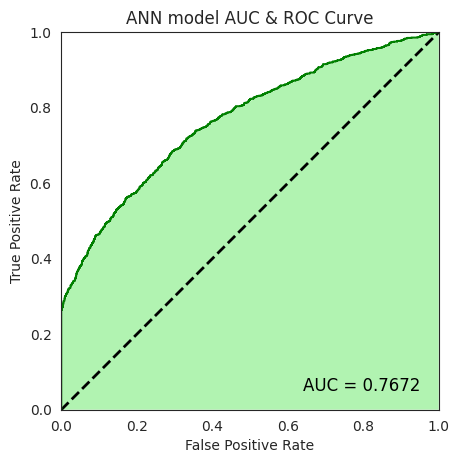

In [ ]:
# ANN model AUC and ROC curve.
ann_roc_auc_2 = roc_auc_score(y_ann_test, MLPC_model_2.predict_proba(X_ann_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_ann_test, MLPC_model_2.predict_proba(X_ann_test)[:,1])
plt.figure(figsize = (5, 5), dpi = 100)
lw = 2
plt.axis('scaled')
plt.plot([0, 1], [0, 1],color = 'black', lw = lw, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ANN model AUC & ROC Curve')
plt.plot(fpr, tpr, 'green')
plt.fill_between(fpr, tpr, facecolor = 'lightgreen', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % ann_roc_auc_2, ha ='right', fontsize = 12, color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Calculating the g-mean for each threshold
gmeans_a_2 = sqrt(tpr * (1 - fpr))

# Locating the index of the largest g-mean
ix_a_2 = argmax(gmeans_a_2)

print('Best Threshold = %f, G-Mean = %.3f' % (thresholds[ix_a_2], gmeans_a_2[ix_a_2]))

Best Threshold = 0.279257, G-Mean = 0.695


In [ ]:
y_proba_a_2 = MLPC_model_2.predict_proba(X_ann_test)[:,1]

In [ ]:
# Defing thresholds.
thresholds = arange(0, 1, 0.001)

# Evaluating each threshold.
scores_a_2 = [f1_score(y_ann_test, to_labels(y_proba_a_2, t)) for t in thresholds]

# Getting best threshold.
ix_a_2 = argmax(scores_a_2)
print('Optimal Threshold = %.3f, F-Score = %.5f' % (thresholds[ix_a_2], scores_a[ix_a_2]))

Optimal Threshold = 0.280, F-Score = 0.58450


In [ ]:
# Applying optimal threshold.
threshold = 0.280
y_pred_a_2 = (MLPC_model_2.predict_proba(X_ann_test)[:,1] > threshold).astype('float')
confusion_matrix(y_ann_test, y_pred_a_2)

array([[1674,  693],
       [ 356,  766]])

In [ ]:
print(classification_report(y_ann_test, y_pred_a_2, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.82      0.71      0.76      2367
At risk of Heart disease       0.53      0.68      0.59      1122

                accuracy                           0.70      3489
               macro avg       0.67      0.69      0.68      3489
            weighted avg       0.73      0.70      0.71      3489



**Keras** **Model**

**2** **layers**

In [ ]:
# Building a Keras model.
# Rescaling the data for analysis.
# MinMax Scaler transforms features into [0,1]
# Formula: X_rescaled = (Xi - Xmin) / (Xmax-Xmin)

X_ker = heart_imputed.drop('CHD', axis=1)
y_ker = heart_imputed['CHD']

scaler = MinMaxScaler()
X_k = scaler.fit_transform(X_ker)
X_k_rescaled = pd.DataFrame(X_k, columns = X_ker.columns)

In [ ]:
X_k_rescaled.describe()

SEX       TOTCHOL           AGE         SYSBP         DIABP  \
count  11627.000000  11627.000000  11627.000000  11627.000000  11627.000000   
mean       0.568074      0.227918      0.465159      0.249759      0.441981   
std        0.495366      0.076139      0.195190      0.107795      0.097168   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.174873      0.326531      0.172577      0.375000   
50%        1.000000      0.223543      0.448980      0.229314      0.433333   
75%        1.000000      0.273345      0.612245      0.309693      0.500000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           CURSMOKE       CIGPDAY           BMI      DIABETES        BPMEDS  \
count  11627.000000  11627.000000  11627.000000  11627.000000  11627.000000   
mean       0.432528      0.091638      0.270211      0.045584      0.086981   
std        0.495448      0.135120      0.096702      0.208589      0.276514   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.204626      0.000000      0.000000   
50%        0.000000      0.000000      0.260798      0.000000      0.000000   
75%        1.000000      0.222222      0.321690      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           HEARTRTE       GLUCOSE       PREVCHD        PREVAP        PREVMI  \
count  11627.000000  11627.000000  11627.000000  11627.000000  11627.000000   
mean       0.217396      0.102975      0.072418      0.053926      0.032167   
std        0.068109      0.054575      0.259189      0.225882      0.176450   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.174863      0.077449      0.000000      0.000000      0.000000   
50%        0.207650      0.093394      0.000000      0.000000      0.000000   
75%        0.262295      0.113895      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           PREVSTRK       PREVHYP  
count  11627.000000  11627.000000  
mean       0.013073      0.459620  
std        0.113592      0.498388  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      1.000000  
max        1.000000      1.000000

In [ ]:
# Splitting data on training and testing.
X_k_train, X_k_test, y_k_train, y_k_test = train_test_split(X_k_rescaled, y_ker, test_size = 0.3, random_state = 1)

In [ ]:
# Keras model.
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()

model.add(Dense(units = 30, activation ='relu'))
model.add(Dense(units = 15, activation ='relu'))
model.add(Dense(units = 1, activation ='sigmoid'))

# For a binary classification problem
model.compile(loss ='binary_crossentropy', optimizer ='adam')

In [ ]:
model.fit(x = X_k_train,
          y = y_k_train,
          batch_size = 128,
          epochs = 100,
          validation_data = (X_k_test, y_k_test), verbose=1
          )

Epoch 1/100
64/64 [==============================] - 1s 5ms/step - loss: 0.6216 - val_loss: 0.5628
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 0.5408 - val_loss: 0.5173
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 0.5142 - val_loss: 0.5047
Epoch 4/100
64/64 [==============================] - 0s 3ms/step - loss: 0.5039 - val_loss: 0.5019
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 0.5013 - val_loss: 0.4953
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4955 - val_loss: 0.4926
Epoch 7/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4935 - val_loss: 0.4915
Epoch 8/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4908 - val_loss: 0.4916
Epoch 9/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4909 - val_loss: 0.4917
Epoch 10/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4893 - val_loss: 0.4893
Epoch 11/

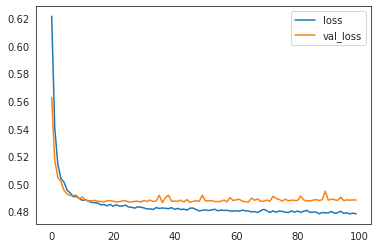

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
from keras.callbacks import EarlyStopping

# Sequential
model = Sequential()
model.add(Dense(units = 30, activation = 'relu'))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss ='binary_crossentropy', optimizer = 'adam')

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

In [ ]:
model.fit(x = X_k_train,
          y = y_k_train,
          batch_size = 128,
          epochs = 100,
          validation_data = (X_k_test, y_k_test), verbose = 1,
          callbacks = [early_stop]
          )

Epoch 1/100
64/64 [==============================] - 1s 5ms/step - loss: 0.6311 - val_loss: 0.5824
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 0.5535 - val_loss: 0.5235
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 0.5181 - val_loss: 0.5057
Epoch 4/100
64/64 [==============================] - 0s 3ms/step - loss: 0.5058 - val_loss: 0.5001
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4994 - val_loss: 0.4956
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4961 - val_loss: 0.4923
Epoch 7/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4922 - val_loss: 0.4917
Epoch 8/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4910 - val_loss: 0.4921
Epoch 9/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4893 - val_loss: 0.4901
Epoch 10/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4883 - val_loss: 0.4895
Epoch 11/

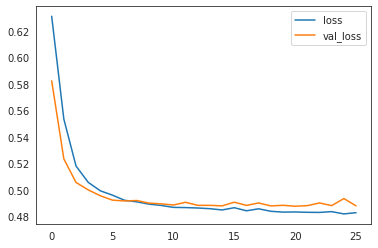

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(units = 30, activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 15, activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation ='sigmoid'))
model.compile(loss ='binary_crossentropy', optimizer ='adam')

In [ ]:
model.fit(x = X_k_train,
          y = y_k_train,
          batch_size = 128,
          epochs = 200,
          validation_data = (X_k_test, y_k_test), verbose = 1,
          callbacks = [early_stop]
          )

Epoch 1/200
64/64 [==============================] - 1s 5ms/step - loss: 0.6629 - val_loss: 0.6102
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6229 - val_loss: 0.5797
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5972 - val_loss: 0.5504
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5736 - val_loss: 0.5299
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5589 - val_loss: 0.5164
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5463 - val_loss: 0.5085
Epoch 7/200
64/64 [==============================] - 0s 4ms/step - loss: 0.5415 - val_loss: 0.5040
Epoch 8/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5338 - val_loss: 0.5008
Epoch 9/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5303 - val_loss: 0.4995
Epoch 10/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5252 - val_loss: 0.4984
Epoch 11/

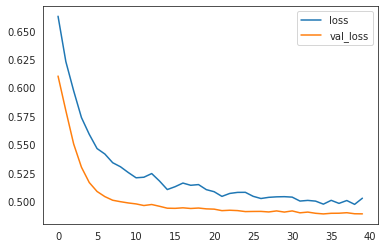

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
y_pred_k = model.predict(X_k_test)

110/110 [==============================] - 0s 1ms/step


In [ ]:
y_pred_k = (y_pred_k >= 0.5)

In [ ]:
print(confusion_matrix(y_k_test, y_pred_k))

[[2349   18]
 [ 791  331]]


In [ ]:
# Classification report (Keras model).
print(classification_report(y_test, y_pred_k, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.75      0.99      0.85      2367
At risk of Heart disease       0.95      0.30      0.45      1122

                accuracy                           0.77      3489
               macro avg       0.85      0.64      0.65      3489
            weighted avg       0.81      0.77      0.72      3489



110/110 [==============================] - 0s 1ms/step


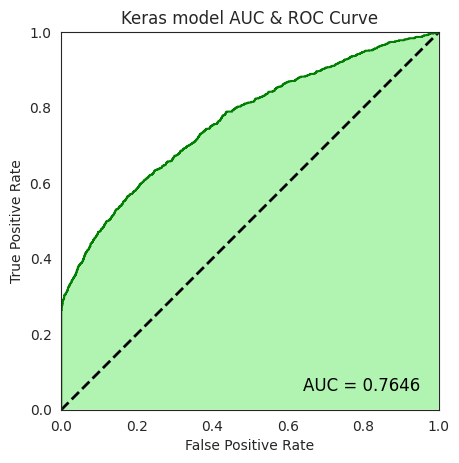

In [ ]:
# Keras model AUC and ROC curve.
k_roc_auc = roc_auc_score(y_k_test, model.predict(X_k_test))
fpr, tpr, thresholds = roc_curve(y_k_test, model.predict(X_k_test))
plt.figure(figsize = (5, 5), dpi = 100)
lw = 2
plt.axis('scaled')
plt.plot([0, 1], [0, 1],color = 'black', lw = lw, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Keras model AUC & ROC Curve')
plt.plot(fpr, tpr, 'green')
plt.fill_between(fpr, tpr, facecolor = 'lightgreen', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % k_roc_auc, ha ='right', fontsize = 12, color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Calculating the g-mean for each threshold
gmeans_ker = sqrt(tpr * (1 - fpr))

# Locating the index of the largest g-mean
ix_ker = argmax(gmeans_ker)

print('Best Threshold = %f, G-Mean = %.3f' % (thresholds[ix_ker], gmeans_ker[ix_ker]))

Best Threshold = 0.315457, G-Mean = 0.690


In [ ]:
y_pred_ker = model.predict(X_k_test)

110/110 [==============================] - 0s 1ms/step


In [ ]:
# Defing thresholds.
thresholds = arange(0, 1, 0.001)

# Evaluating each threshold.
scores_ker = [f1_score(y_k_test, to_labels(y_pred_ker, t)) for t in thresholds]

# Getting best threshold.
ix_ker = argmax(scores_ker)
print('Optimal Threshold = %.3f, F-Score = %.5f' % (thresholds[ix_ker], scores_ker[ix_ker]))

Optimal Threshold = 0.320, F-Score = 0.58779


In [ ]:
# Applying optimal threshold.
threshold = 0.320
y_pred_ker_ = (model.predict(X_k_test) > threshold).astype('float')
confusion_matrix(y_k_test, y_pred_ker_)

110/110 [==============================] - 0s 3ms/step


array([[1812,  555],
       [ 424,  698]])

In [ ]:
print(classification_report(y_k_test, y_pred_ker_, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.81      0.77      0.79      2367
At risk of Heart disease       0.56      0.62      0.59      1122

                accuracy                           0.72      3489
               macro avg       0.68      0.69      0.69      3489
            weighted avg       0.73      0.72      0.72      3489



110/110 [==============================] - 0s 1ms/step


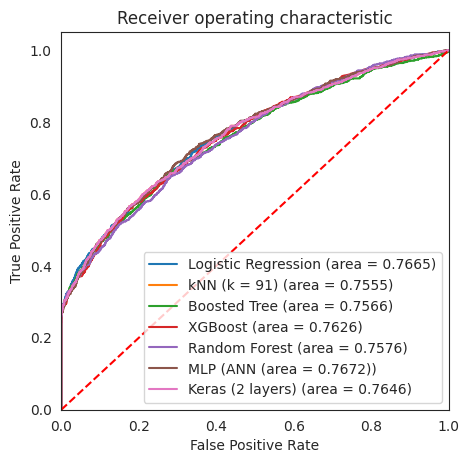

In [ ]:
# ROC AUC for all models.
# Logistic Regression model.
logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
log_fpr, log_tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])

# kNN model (with optimal k = 65).
knn_roc_auc = roc_auc_score(y_knn_test, knn_2.predict_proba(X_knn_test)[:,1])
k_fpr, k_tpr, thresholds = roc_curve(y_knn_test, knn_2.predict_proba(X_knn_test)[:,1])

# Boosted tree model.
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])

# XGBoost model.
xg_roc_auc = roc_auc_score(y_test, xg_reg.predict_proba(X_test)[:,1])
xg_fpr, xg_tpr, thresholds = roc_curve(y_test, xg_reg.predict_proba(X_test)[:,1])

# Random forest model.
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

# ANN model (relu/adam).
ann_roc_auc = roc_auc_score(y_ann_test, MLPC_model_2.predict_proba(X_ann_test)[:,1])
a_fpr, a_tpr, thresholds = roc_curve(y_ann_test, MLPC_model_2.predict_proba(X_ann_test)[:,1])

# Keras model (2 layers).
k_roc_auc = roc_auc_score(y_k_test, model.predict(X_k_test))
k_fpr, k_tpr, thresholds = roc_curve(y_k_test, model.predict(X_k_test))

plt.figure(figsize = (5, 5), dpi = 100)

plt.plot(log_fpr, log_tpr, label ='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot(k_fpr, k_tpr, label ='kNN (k = 91) (area = %0.4f)' % knn_roc_auc)
plt.plot(bt_fpr, bt_tpr, label ='Boosted Tree (area = %0.4f)' % bt_roc_auc)
plt.plot(xg_fpr, xg_tpr, label ='XGBoost (area = %0.4f)' % xg_roc_auc)
plt.plot(rf_fpr, rf_tpr, label ='Random Forest (area = %0.4f)' % rf_roc_auc)
plt.plot(a_fpr, a_tpr, label ='MLP (ANN (area = %0.4f))' % ann_roc_auc)
plt.plot(k_fpr, k_tpr, label ='Keras (2 layers) (area = %0.4f)' % k_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**ROC** **AUC**:
- Logistic - 76.65%
- kNN (k = 5) - 71.98%
- kNN optimal (k = 91) - 75.55%
- Boosted tree - 75.66%
- Random Forest - 75.76%
- XGBoost - 76.26%
- ANN (logistic/adam) - 76.59%
- ANN (relu/adam) - 76.72%
- Keras (2 layers) - 76.46%

Based on ROC AUC score, 2 best model for optimization are ANN (relu/adam) and Keras (2 layers)

**Optimization**

**ANN** **Model**
- **activation** **function**: '**relu**'
- **solver**: '**adam**'
     - **min**/**max**: **10**/**100**

In [ ]:
# Optimizing ANN model.
# Changing model parameters
# activation function = 'relu'
# solver = 'adam'

from sklearn.model_selection import cross_val_score

min_hidden_layer_size = 10
max_hidden_layer_size = 100
cv_scores_opt = [ ]

for s in range(min_hidden_layer_size, max_hidden_layer_size, 5):
    MLPC_model = MLPClassifier(hidden_layer_sizes = s, activation ='relu', solver ='adam', random_state = 1)
    scores = cross_val_score(MLPC_model, X_ann_train, y_ann_train.values.ravel(), cv = 5, scoring = "roc_auc")
    cv_scores_opt.append(scores.mean())

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print ("Optimal size of hidden layer: ", (cv_scores_opt.index(max(cv_scores_opt))+1)*5)

Optimal size of hidden layer:  75


In [ ]:
# Rebuilding ANN model with optimal number of nodes: 75.
# activation function = 'relu'
# solver = 'adam'
MLPC_model_opt = MLPClassifier(hidden_layer_sizes = 75, activation = 'relu', solver = 'adam', random_state = 1)
MLPC_model_opt.fit(X_ann_train, y_ann_train)

y_pred_mlpc_opt = MLPC_model_opt.predict(X_ann_test)

In [ ]:
# Displaying the confusion matrix (ANN model, number of nodes 75).
print(confusion_matrix(y_ann_test, y_pred_mlpc_opt))

[[2290   77]
 [ 737  385]]


In [ ]:
# Classification report (ANN model, number of nodes 75).
print(classification_report(y_ann_test, y_pred_mlpc_opt, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.76      0.97      0.85      2367
At risk of Heart disease       0.83      0.34      0.49      1122

                accuracy                           0.77      3489
               macro avg       0.79      0.66      0.67      3489
            weighted avg       0.78      0.77      0.73      3489



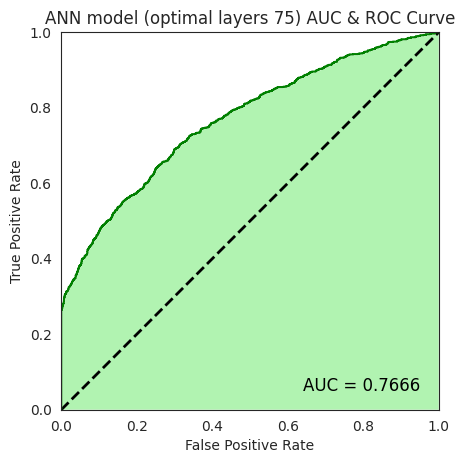

In [ ]:
# ANN model (optimal layers 75) AUC and ROC curve.
ann_roc_auc = roc_auc_score(y_ann_test, MLPC_model_opt.predict_proba(X_ann_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_ann_test, MLPC_model_opt.predict_proba(X_ann_test)[:,1])
plt.figure(figsize = (5, 5), dpi = 100)
lw = 2
plt.axis('scaled')
plt.plot([0, 1], [0, 1],color = 'black', lw = lw, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ANN model (optimal layers 75) AUC & ROC Curve')
plt.plot(fpr, tpr, 'green')
plt.fill_between(fpr, tpr, facecolor = 'lightgreen', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % ann_roc_auc, ha ='right', fontsize = 12, color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Calculating the g-mean for each threshold
gmeans_a_75 = sqrt(tpr * (1 - fpr))

# Locating the index of the largest g-mean
ix_a_75 = argmax(gmeans_a_75)

print('Best Threshold = %f, G-Mean = %.3f' % (thresholds[ix_a_75], gmeans_a_75[ix_a_75]))

Best Threshold = 0.281855, G-Mean = 0.695


In [ ]:
y_pred_ann_75 = MLPC_model_opt.predict_proba(X_ann_test)[:,1]

In [ ]:
# Defing thresholds.
thresholds = arange(0, 1, 0.001)

# Evaluating each threshold.
scores_ann_75 = [f1_score(y_ann_test, to_labels(y_pred_ann_75, t)) for t in thresholds]

# Getting best threshold.
ix_ann_75 = argmax(scores_ann_75)
print('Optimal Threshold = %.3f, F-Score = %.5f' % (thresholds[ix_ann_75], scores_ann_75[ix_ann_75]))

Optimal Threshold = 0.264, F-Score = 0.59424


In [ ]:
# Applying optimal threshold.
threshold = 0.264
y_pred_ann_75_ = (MLPC_model_opt.predict_proba(X_ann_test)[:,1] > threshold).astype('float')
confusion_matrix(y_ann_test, y_pred_ann_75_)

array([[1561,  806],
       [ 307,  815]])

In [ ]:
print(classification_report(y_ann_test, y_pred_ann_75_, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.84      0.66      0.74      2367
At risk of Heart disease       0.50      0.73      0.59      1122

                accuracy                           0.68      3489
               macro avg       0.67      0.69      0.67      3489
            weighted avg       0.73      0.68      0.69      3489



- **activation** **function**: '**logistic**'
- **solver**: '**adam**'
     - **min**/**max**: **10**/**100**

In [ ]:
# Changing model parameters
# activation function = 'logistic'
# solver = 'adam'

min_hidden_layer_size = 10
max_hidden_layer_size = 100
cv_scores_opt = [ ]

for s in range(min_hidden_layer_size, max_hidden_layer_size, 5):
    MLPC_model = MLPClassifier(hidden_layer_sizes = s, activation ='logistic', solver ='adam', random_state = 1)
    scores = cross_val_score(MLPC_model, X_ann_train, y_ann_train.values.ravel(), cv = 5, scoring = "roc_auc")
    cv_scores_opt.append(scores.mean())

In [ ]:
print ("Optimal size of hidden layer: ", (cv_scores_opt.index(max(cv_scores_opt))+1)*5)

Optimal size of hidden layer:  75


In [ ]:
# Rebuilding ANN model with optimal number of nodes: 75.
# activation function = 'logistic'
# solver = 'adam'
MLPC_model_opt_2 = MLPClassifier(hidden_layer_sizes = 75, activation = 'logistic', solver = 'adam', random_state = 1)
MLPC_model_opt_2.fit(X_ann_train, y_ann_train)

y_pred_mlpc_opt_2 = MLPC_model_opt_2.predict(X_ann_test)

In [ ]:
# Displaying the confusion matrix (ANN model, nodes: 75).
print(confusion_matrix(y_ann_test, y_pred_mlpc_opt_2))

[[2268   99]
 [ 691  431]]


In [ ]:
# Classification report (ANN model, nodes 75).
print(classification_report(y_ann_test, y_pred_mlpc_opt_2, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.77      0.96      0.85      2367
At risk of Heart disease       0.81      0.38      0.52      1122

                accuracy                           0.77      3489
               macro avg       0.79      0.67      0.69      3489
            weighted avg       0.78      0.77      0.75      3489



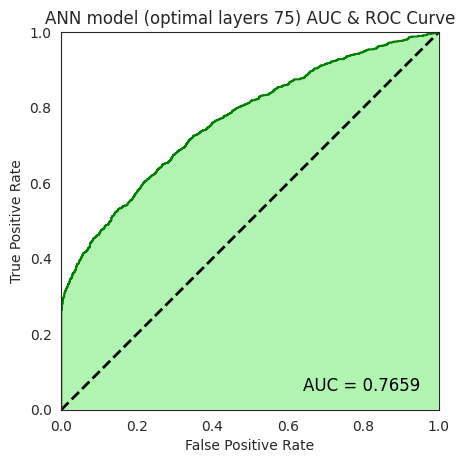

In [ ]:
# ANN model (logistic/adam, optimal layers 75) AUC and ROC curve.
ann_roc_auc = roc_auc_score(y_ann_test, MLPC_model_opt_2.predict_proba(X_ann_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_ann_test, MLPC_model_opt_2.predict_proba(X_ann_test)[:,1])
plt.figure(figsize = (5, 5), dpi = 100)
lw = 2
plt.axis('scaled')
plt.plot([0, 1], [0, 1],color = 'black', lw = lw, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ANN model (optimal layers 75) AUC & ROC Curve')
plt.plot(fpr, tpr, 'green')
plt.fill_between(fpr, tpr, facecolor = 'lightgreen', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % ann_roc_auc, ha ='right', fontsize = 12, color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Calculating the g-mean for each threshold
gmeans_a_75_l = sqrt(tpr * (1 - fpr))

# Locating the index of the largest g-mean
ix_a_75_l = argmax(gmeans_a_75_l)

print('Best Threshold = %f, G-Mean = %.3f' % (thresholds[ix_a_75_l], gmeans_a_75_l[ix_a_75_l]))

Best Threshold = 0.322073, G-Mean = 0.690


In [ ]:
y_pred_ann_75_l = MLPC_model_opt_2.predict_proba(X_ann_test)[:,1]

In [ ]:
# Defing thresholds.
thresholds = arange(0, 1, 0.001)

# Evaluating each threshold.
scores_ann_75_l = [f1_score(y_ann_test, to_labels(y_pred_ann_75_l, t)) for t in thresholds]

# Getting best threshold.
ix_ann_75_l = argmax(scores_ann_75_l)
print('Optimal Threshold = %.3f, F-Score = %.5f' % (thresholds[ix_ann_75_l], scores_ann_75_l[ix_ann_75_l]))

Optimal Threshold = 0.288, F-Score = 0.58811


In [ ]:
# Applying optimal threshold.
threshold = 0.288
y_pred_ann_75_l_ = (MLPC_model_opt_2.predict_proba(X_ann_test)[:,1] > threshold).astype('float')
confusion_matrix(y_ann_test, y_pred_ann_75_l_)

array([[1542,  825],
       [ 311,  811]])

In [ ]:
print(classification_report(y_ann_test, y_pred_ann_75_l_, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.83      0.65      0.73      2367
At risk of Heart disease       0.50      0.72      0.59      1122

                accuracy                           0.67      3489
               macro avg       0.66      0.69      0.66      3489
            weighted avg       0.72      0.67      0.68      3489



- **activation** **function**: '**logistic**'
- **solver**: '**adam**'
     - **min**/**max**: **18**/**324**

In [ ]:
# Changing model parameters
# activation function = 'logistic'
# solver = 'adam'

min_hidden_layer_size = 18
max_hidden_layer_size = 324
cv_scores_opt_ = [ ]

for s in range(min_hidden_layer_size, max_hidden_layer_size, 5):
    MLPC_model = MLPClassifier(hidden_layer_sizes = s, activation ='logistic', solver ='adam', random_state = 1)
    scores = cross_val_score(MLPC_model, X_ann_train, y_ann_train.values.ravel(), cv = 5, scoring = "roc_auc")
    cv_scores_opt_.append(scores.mean())

In [ ]:
print ("Optimal size of hidden layer: ", (cv_scores_opt_.index(max(cv_scores_opt_))+1)*5)

Optimal size of hidden layer:  10


In [ ]:
# Rebuilding ANN model with optimal number of nodes: 10.
# activation function = 'logistic'
# solver = 'adam'
MLPC_model_opt_10 = MLPClassifier(hidden_layer_sizes = 10, activation = 'logistic', solver = 'adam', random_state = 1)
MLPC_model_opt_10.fit(X_ann_train, y_ann_train)

y_pred_mlpc_opt_10 = MLPC_model_opt_10.predict(X_ann_test)

In [ ]:
# Displaying the confusion matrix (ANN model, nodes: 10).
print(confusion_matrix(y_ann_test, y_pred_mlpc_opt_10))

[[2298   69]
 [ 725  397]]


In [ ]:
# Classification report (ANN model, nodes 6).
print(classification_report(y_ann_test, y_pred_mlpc_opt_10, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.76      0.97      0.85      2367
At risk of Heart disease       0.85      0.35      0.50      1122

                accuracy                           0.77      3489
               macro avg       0.81      0.66      0.68      3489
            weighted avg       0.79      0.77      0.74      3489



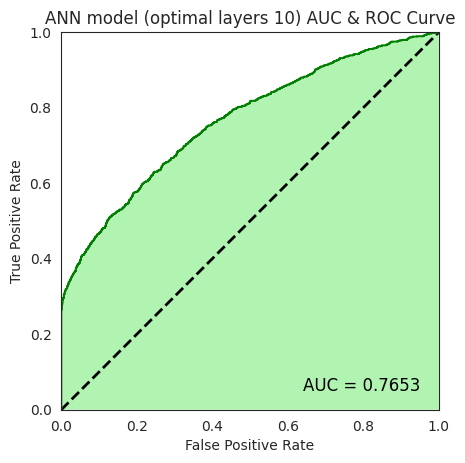

In [ ]:
# ANN model (optimal layers 10) AUC and ROC curve.
ann_roc_auc = roc_auc_score(y_ann_test, MLPC_model_opt_10.predict_proba(X_ann_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_ann_test, MLPC_model_opt_10.predict_proba(X_ann_test)[:,1])
plt.figure(figsize = (5, 5), dpi = 100)
lw = 2
plt.axis('scaled')
plt.plot([0, 1], [0, 1],color = 'black', lw = lw, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ANN model (optimal layers 10) AUC & ROC Curve')
plt.plot(fpr, tpr, 'green')
plt.fill_between(fpr, tpr, facecolor = 'lightgreen', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % ann_roc_auc, ha ='right', fontsize = 12, color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Calculating the g-mean for each threshold
gmeans_a_10 = sqrt(tpr * (1 - fpr))

# Locating the index of the largest g-mean
ix_a_10 = argmax(gmeans_a_10)

print('Best Threshold = %f, G-Mean = %.3f' % (thresholds[ix_a_10], gmeans_a_10[ix_a_10]))

Best Threshold = 0.307794, G-Mean = 0.689


In [ ]:
y_pred_ann_10 = MLPC_model_opt_10.predict_proba(X_ann_test)[:,1]

In [ ]:
# Defing thresholds.
thresholds = arange(0, 1, 0.001)

# Evaluating each threshold.
scores_ann_10 = [f1_score(y_ann_test, to_labels(y_pred_ann_10, t)) for t in thresholds]

# Getting best threshold.
ix_ann_10 = argmax(scores_ann_10)
print('Optimal Threshold = %.3f, F-Score = %.5f' % (thresholds[ix_ann_10], scores_ann_10[ix_ann_10]))

Optimal Threshold = 0.272, F-Score = 0.58605


In [ ]:
# Applying optimal threshold.
threshold = 0.272
y_pred_ann_10_ = (MLPC_model_opt_10.predict_proba(X_ann_test)[:,1] > threshold).astype('float')
confusion_matrix(y_ann_test, y_pred_ann_10_)

array([[1583,  784],
       [ 332,  790]])

In [ ]:
print(classification_report(y_ann_test, y_pred_ann_10_, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.83      0.67      0.74      2367
At risk of Heart disease       0.50      0.70      0.59      1122

                accuracy                           0.68      3489
               macro avg       0.66      0.69      0.66      3489
            weighted avg       0.72      0.68      0.69      3489



- **activation** **function**: '**relu**'
- **solver**: '**adam**'
     - **min**/**max**: **18**/**324**

In [ ]:
# Changing model parameters
# activation function = 'relu'
# solver = 'adam'

min_hidden_layer_size = 18
max_hidden_layer_size = 324
cv_scores_opt_2 = [ ]

for s in range(min_hidden_layer_size, max_hidden_layer_size, 5):
    MLPC_model = MLPClassifier(hidden_layer_sizes = s, activation ='relu', solver ='adam', random_state = 1)
    scores = cross_val_score(MLPC_model, X_ann_train, y_ann_train.values.ravel(), cv = 5, scoring = "roc_auc")
    cv_scores_opt_2.append(scores.mean())

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

In [ ]:
print ("Optimal size of hidden layer: ", (cv_scores_opt_2.index(max(cv_scores_opt_2))+1)*5)

Optimal size of hidden layer:  285


In [ ]:
# Rebuilding ANN model with optimal number of nodes: 285.
# activation function = 'relu'
# solver = 'adam'
MLPC_model_opt_285 = MLPClassifier(hidden_layer_sizes = 285, activation = 'relu', solver = 'adam', random_state = 1)
MLPC_model_opt_285.fit(X_ann_train, y_ann_train)

y_pred_mlpc_opt_285 = MLPC_model_opt_285.predict(X_ann_test)

In [ ]:
# Displaying the confusion matrix (ANN model, nodes: 285).
print(confusion_matrix(y_ann_test, y_pred_mlpc_opt_285))

[[2283   84]
 [ 735  387]]


In [ ]:
# Classification report (ANN model, nodes 285).
print(classification_report(y_ann_test, y_pred_mlpc_opt_285, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.76      0.96      0.85      2367
At risk of Heart disease       0.82      0.34      0.49      1122

                accuracy                           0.77      3489
               macro avg       0.79      0.65      0.67      3489
            weighted avg       0.78      0.77      0.73      3489



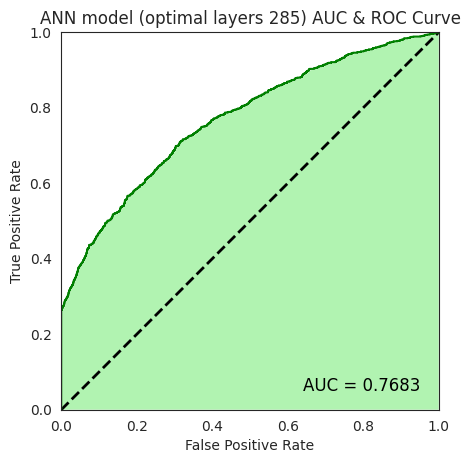

In [ ]:
# ANN model (optimal layers 285) AUC and ROC curve.
ann_roc_auc = roc_auc_score(y_ann_test, MLPC_model_opt_285.predict_proba(X_ann_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_ann_test, MLPC_model_opt_285.predict_proba(X_ann_test)[:,1])
plt.figure(figsize = (5, 5), dpi = 100)
lw = 2
plt.axis('scaled')
plt.plot([0, 1], [0, 1],color = 'black', lw = lw, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ANN model (optimal layers 285) AUC & ROC Curve')
plt.plot(fpr, tpr, 'green')
plt.fill_between(fpr, tpr, facecolor = 'lightgreen', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % ann_roc_auc, ha ='right', fontsize = 12, color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Calculating the g-mean for each threshold
gmeans_a_285 = sqrt(tpr * (1 - fpr))

# Locating the index of the largest g-mean
ix_a_285 = argmax(gmeans_a_285)

print('Best Threshold = %f, G-Mean = %.3f' % (thresholds[ix_a_285], gmeans_a_285[ix_a_285]))

Best Threshold = 0.291114, G-Mean = 0.697


In [ ]:
y_pred_ann_285 = MLPC_model_opt_285.predict_proba(X_ann_test)[:,1]

In [ ]:
# Defing thresholds.
thresholds = arange(0, 1, 0.001)

# Evaluating each threshold.
scores_ann_285 = [f1_score(y_ann_test, to_labels(y_pred_ann_285, t)) for t in thresholds]

# Getting best threshold.
ix_ann_285 = argmax(scores_ann_285)
print('Optimal Threshold = %.3f, F-Score = %.5f' % (thresholds[ix_ann_285], scores_ann_285[ix_ann_285]))

Optimal Threshold = 0.283, F-Score = 0.59755


In [ ]:
# Applying optimal threshold.
threshold = 0.283
y_pred_ann_285_ = (MLPC_model_opt_285.predict_proba(X_ann_test)[:,1] > threshold).astype('float')
confusion_matrix(y_ann_test, y_pred_ann_285_)

array([[1602,  765],
       [ 318,  804]])

In [ ]:
print(classification_report(y_ann_test, y_pred_ann_285_, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.83      0.68      0.75      2367
At risk of Heart disease       0.51      0.72      0.60      1122

                accuracy                           0.69      3489
               macro avg       0.67      0.70      0.67      3489
            weighted avg       0.73      0.69      0.70      3489



**Keras** **5** **layers**

In [ ]:
# Keras with 5 layers.
model_5 = Sequential()

model_5.add(Dense(units = 100, activation ='relu'))
model_5.add(Dense(units = 100, activation ='relu'))
model_5.add(Dense(units = 50, activation ='relu'))
model_5.add(Dense(units = 50, activation ='relu'))
model_5.add(Dense(units = 25, activation ='relu'))
model_5.add(Dense(units = 1, activation ='sigmoid'))

# For a binary classification problem
model_5.compile(loss ='binary_crossentropy', optimizer ='adam')

In [ ]:
model_5.fit(x = X_k_train,
          y = y_k_train,
          batch_size = 128,
          epochs = 100,
          validation_data = (X_k_test, y_k_test), verbose=1
          )

Epoch 1/100
64/64 [==============================] - 1s 8ms/step - loss: 0.5747 - val_loss: 0.5167
Epoch 2/100
64/64 [==============================] - 0s 5ms/step - loss: 0.5020 - val_loss: 0.4974
Epoch 3/100
64/64 [==============================] - 0s 5ms/step - loss: 0.4983 - val_loss: 0.4923
Epoch 4/100
64/64 [==============================] - 0s 5ms/step - loss: 0.4933 - val_loss: 0.4902
Epoch 5/100
64/64 [==============================] - 0s 5ms/step - loss: 0.4926 - val_loss: 0.4908
Epoch 6/100
64/64 [==============================] - 0s 5ms/step - loss: 0.4878 - val_loss: 0.5152
Epoch 7/100
64/64 [==============================] - 0s 5ms/step - loss: 0.4920 - val_loss: 0.4927
Epoch 8/100
64/64 [==============================] - 0s 5ms/step - loss: 0.4855 - val_loss: 0.4908
Epoch 9/100
64/64 [==============================] - 0s 5ms/step - loss: 0.4866 - val_loss: 0.4935
Epoch 10/100
64/64 [==============================] - 0s 5ms/step - loss: 0.4852 - val_loss: 0.4880
Epoch 11/

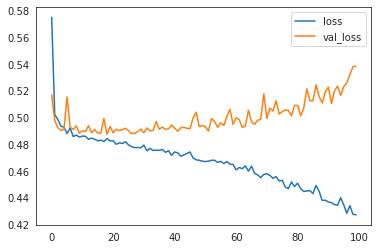

In [ ]:
model_loss_5 = pd.DataFrame(model_5.history.history)
model_loss_5.plot()

In [ ]:
# Sequential
model_5 = Sequential()
model_5.add(Dense(units = 100, activation = 'relu'))
model_5.add(Dense(units = 100, activation = 'relu'))
model_5.add(Dense(units = 50, activation = 'relu'))
model_5.add(Dense(units = 50, activation = 'relu'))
model_5.add(Dense(units = 25, activation = 'relu'))
model_5.add(Dense(units = 1, activation = 'sigmoid'))

model_5.compile(loss ='binary_crossentropy', optimizer = 'adam')

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

In [ ]:
model_5.fit(x = X_k_train,
          y = y_k_train,
          batch_size = 128,
          epochs = 100,
          validation_data = (X_k_test, y_k_test), verbose = 1,
          callbacks = [early_stop]
          )

Epoch 1/100
64/64 [==============================] - 1s 8ms/step - loss: 0.5704 - val_loss: 0.5051
Epoch 2/100
64/64 [==============================] - 0s 5ms/step - loss: 0.5027 - val_loss: 0.4928
Epoch 3/100
64/64 [==============================] - 0s 6ms/step - loss: 0.4961 - val_loss: 0.4906
Epoch 4/100
64/64 [==============================] - 0s 5ms/step - loss: 0.4901 - val_loss: 0.4964
Epoch 5/100
64/64 [==============================] - 0s 6ms/step - loss: 0.4921 - val_loss: 0.4919
Epoch 6/100
64/64 [==============================] - 0s 5ms/step - loss: 0.4872 - val_loss: 0.4943
Epoch 7/100
64/64 [==============================] - 0s 5ms/step - loss: 0.4859 - val_loss: 0.4888
Epoch 8/100
64/64 [==============================] - 0s 5ms/step - loss: 0.4891 - val_loss: 0.4908
Epoch 9/100
64/64 [==============================] - 0s 5ms/step - loss: 0.4847 - val_loss: 0.4967
Epoch 10/100
64/64 [==============================] - 0s 5ms/step - loss: 0.4866 - val_loss: 0.4891
Epoch 11/

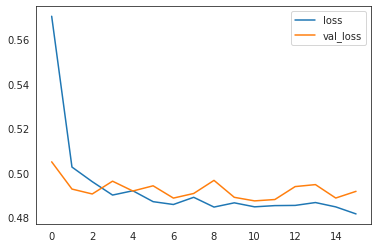

In [ ]:
model_loss_5 = pd.DataFrame(model_5.history.history)
model_loss_5.plot()

In [ ]:
model_5 = Sequential()
model_5.add(Dense(units = 100, activation ='relu'))
model_5.add(Dropout(0.5))

model_5.add(Dense(units = 100, activation ='relu'))
model_5.add(Dropout(0.5))

model_5.add(Dense(units = 50, activation ='relu'))
model_5.add(Dropout(0.5))

model_5.add(Dense(units = 50, activation ='relu'))
model_5.add(Dropout(0.5))

model_5.add(Dense(units = 25, activation ='relu'))
model_5.add(Dropout(0.5))

model_5.add(Dense(units = 1, activation ='sigmoid'))

model_5.compile(loss ='binary_crossentropy', optimizer ='adam')

In [ ]:
model_5.fit(x = X_k_train,
          y = y_k_train,
          batch_size = 128,
          epochs = 200,
          validation_data = (X_k_test, y_k_test), verbose = 1,
          callbacks = [early_stop]
          )

Epoch 1/200
64/64 [==============================] - 1s 8ms/step - loss: 0.6684 - val_loss: 0.6223
Epoch 2/200
64/64 [==============================] - 0s 6ms/step - loss: 0.6309 - val_loss: 0.5898
Epoch 3/200
64/64 [==============================] - 0s 6ms/step - loss: 0.5968 - val_loss: 0.5372
Epoch 4/200
64/64 [==============================] - 0s 6ms/step - loss: 0.5628 - val_loss: 0.5081
Epoch 5/200
64/64 [==============================] - 0s 6ms/step - loss: 0.5360 - val_loss: 0.5013
Epoch 6/200
64/64 [==============================] - 0s 5ms/step - loss: 0.5366 - val_loss: 0.5088
Epoch 7/200
64/64 [==============================] - 0s 6ms/step - loss: 0.5248 - val_loss: 0.5014
Epoch 8/200
64/64 [==============================] - 0s 6ms/step - loss: 0.5191 - val_loss: 0.5023
Epoch 9/200
64/64 [==============================] - 0s 6ms/step - loss: 0.5213 - val_loss: 0.5006
Epoch 10/200
64/64 [==============================] - 0s 5ms/step - loss: 0.5225 - val_loss: 0.5013
Epoch 11/

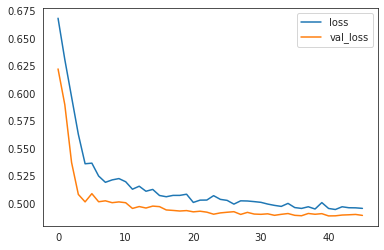

In [ ]:
model_loss_5 = pd.DataFrame(model_5.history.history)
model_loss_5.plot()

In [ ]:
y_pred_k_5 = model_5.predict(X_k_test)

110/110 [==============================] - 1s 6ms/step


In [ ]:
y_pred_k_5 = (y_pred_k_5 >= 0.5)

In [ ]:
print(confusion_matrix(y_k_test, y_pred_k_5))

[[2367    0]
 [ 824  298]]


In [ ]:
# Classification report (Keras model).
print(classification_report(y_test, y_pred_k_5, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.74      1.00      0.85      2367
At risk of Heart disease       1.00      0.27      0.42      1122

                accuracy                           0.76      3489
               macro avg       0.87      0.63      0.64      3489
            weighted avg       0.82      0.76      0.71      3489



110/110 [==============================] - 0s 2ms/step


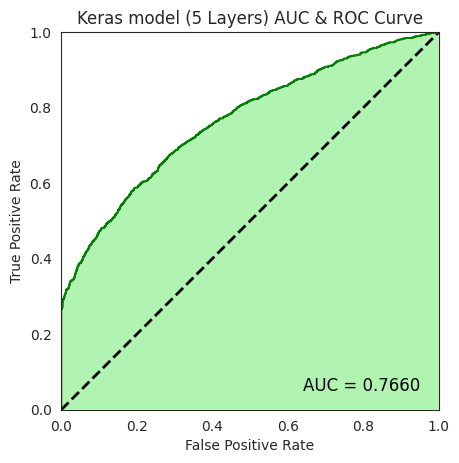

In [ ]:
# Keras model AUC and ROC curve.
k_roc_auc = roc_auc_score(y_k_test, model_5.predict(X_k_test))
fpr, tpr, thresholds = roc_curve(y_k_test, model_5.predict(X_k_test))
plt.figure(figsize = (5, 5), dpi = 100)
lw = 2
plt.axis('scaled')
plt.plot([0, 1], [0, 1],color = 'black', lw = lw, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Keras model (5 Layers) AUC & ROC Curve')
plt.plot(fpr, tpr, 'green')
plt.fill_between(fpr, tpr, facecolor = 'lightgreen', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % k_roc_auc, ha ='right', fontsize = 12, color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Calculating the g-mean for each threshold
gmeans_ker_5 = sqrt(tpr * (1 - fpr))

# Locating the index of the largest g-mean
ix_ker_5 = argmax(gmeans_ker_5)

print('Best Threshold = %f, G-Mean = %.3f' % (thresholds[ix_ker_5], gmeans_ker[ix_ker_5]))

Best Threshold = 0.291885, G-Mean = 0.686


In [ ]:
y_pred_ker_5 = model_5.predict(X_k_test)

110/110 [==============================] - 0s 2ms/step


In [ ]:
# Defing thresholds.
thresholds = arange(0, 1, 0.001)

# Evaluating each threshold.
scores_ker_5 = [f1_score(y_k_test, to_labels(y_pred_ker_5, t)) for t in thresholds]

# Getting best threshold.
ix_ker_5 = argmax(scores_ker_5)
print('Optimal Threshold = %.3f, F-Score = %.5f' % (thresholds[ix_ker_5], scores_ker_5[ix_ker_5]))

Optimal Threshold = 0.293, F-Score = 0.59187


In [ ]:
# Applying optimal threshold.
threshold = 0.293
y_pred_ker_5_ = (model_5.predict(X_k_test) > threshold).astype('float')
confusion_matrix(y_k_test, y_pred_ker_5_)

110/110 [==============================] - 0s 3ms/step


array([[1688,  679],
       [ 365,  757]])

In [ ]:
print(classification_report(y_k_test, y_pred_ker_5_, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.82      0.71      0.76      2367
At risk of Heart disease       0.53      0.67      0.59      1122

                accuracy                           0.70      3489
               macro avg       0.67      0.69      0.68      3489
            weighted avg       0.73      0.70      0.71      3489



In [ ]:
# Keras with 5 layers.
# optimizer = 'adam'

model_opt = Sequential()

model_opt.add(Dense(units = 256, activation ='relu'))
model_opt.add(Dense(units = 128, activation ='relu'))
model_opt.add(Dense(units = 128, activation ='relu'))
model_opt.add(Dense(units = 64, activation ='relu'))
model_opt.add(Dense(units = 32, activation ='relu'))
model_opt.add(Dense(units = 1, activation ='sigmoid'))

# For a binary classification problem
model_opt.compile(loss ='binary_crossentropy', optimizer ='adam')

In [ ]:
model_opt.fit(x = X_k_train,
          y = y_k_train,
          batch_size = 128,
          epochs = 100,
          validation_data = (X_k_test, y_k_test), verbose=1
          )

Epoch 1/100
64/64 [==============================] - 1s 11ms/step - loss: 0.5434 - val_loss: 0.5004
Epoch 2/100
64/64 [==============================] - 0s 7ms/step - loss: 0.4994 - val_loss: 0.5000
Epoch 3/100
64/64 [==============================] - 0s 7ms/step - loss: 0.4937 - val_loss: 0.5036
Epoch 4/100
64/64 [==============================] - 1s 8ms/step - loss: 0.4914 - val_loss: 0.4911
Epoch 5/100
64/64 [==============================] - 1s 8ms/step - loss: 0.4919 - val_loss: 0.4907
Epoch 6/100
64/64 [==============================] - 0s 7ms/step - loss: 0.4888 - val_loss: 0.4936
Epoch 7/100
64/64 [==============================] - 1s 8ms/step - loss: 0.4854 - val_loss: 0.4913
Epoch 8/100
64/64 [==============================] - 0s 7ms/step - loss: 0.4862 - val_loss: 0.4891
Epoch 9/100
64/64 [==============================] - 0s 6ms/step - loss: 0.4845 - val_loss: 0.4887
Epoch 10/100
64/64 [==============================] - 0s 7ms/step - loss: 0.4859 - val_loss: 0.4870
Epoch 11

In [ ]:
# Sequential
from keras.callbacks import EarlyStopping
model_opt = Sequential()
model_opt.add(Dense(units = 256, activation = 'relu'))
model_opt.add(Dense(units = 128, activation = 'relu'))
model_opt.add(Dense(units = 128, activation = 'relu'))
model_opt.add(Dense(units = 64, activation = 'relu'))
model_opt.add(Dense(units = 32, activation = 'relu'))
model_opt.add(Dense(units = 1, activation = 'sigmoid'))

model_opt.compile(loss ='binary_crossentropy', optimizer = 'adam')

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

In [ ]:
model_opt.fit(x = X_k_train,
          y = y_k_train,
          batch_size = 128,
          epochs = 100,
          validation_data = (X_k_test, y_k_test), verbose = 1,
          callbacks = [early_stop]
          )

Epoch 1/100
64/64 [==============================] - 1s 9ms/step - loss: 0.5678 - val_loss: 0.5140
Epoch 2/100
64/64 [==============================] - 0s 8ms/step - loss: 0.5025 - val_loss: 0.4965
Epoch 3/100
64/64 [==============================] - 1s 8ms/step - loss: 0.4950 - val_loss: 0.4975
Epoch 4/100
64/64 [==============================] - 1s 9ms/step - loss: 0.4893 - val_loss: 0.4918
Epoch 5/100
64/64 [==============================] - 1s 8ms/step - loss: 0.4878 - val_loss: 0.4890
Epoch 6/100
64/64 [==============================] - 1s 8ms/step - loss: 0.4861 - val_loss: 0.4911
Epoch 7/100
64/64 [==============================] - 1s 9ms/step - loss: 0.4863 - val_loss: 0.4915
Epoch 8/100
64/64 [==============================] - 0s 8ms/step - loss: 0.4872 - val_loss: 0.4945
Epoch 9/100
64/64 [==============================] - 1s 8ms/step - loss: 0.4855 - val_loss: 0.4886
Epoch 10/100
64/64 [==============================] - 1s 8ms/step - loss: 0.4842 - val_loss: 0.4947
Epoch 11/

In [ ]:
from keras.layers import Dropout
model_opt = Sequential()
model_opt.add(Dense(units = 256, activation ='relu'))
model_opt.add(Dropout(0.5))

model_opt.add(Dense(units = 128, activation ='relu'))
model_opt.add(Dropout(0.5))

model_opt.add(Dense(units = 128, activation ='relu'))
model_opt.add(Dropout(0.5))

model_opt.add(Dense(units = 64, activation ='relu'))
model_opt.add(Dropout(0.5))

model_opt.add(Dense(units = 32, activation ='relu'))
model_opt.add(Dropout(0.5))

model_opt.add(Dense(units = 1, activation ='sigmoid'))

model_opt.compile(loss ='binary_crossentropy', optimizer ='adam')

In [ ]:
model_opt.fit(x = X_k_train,
          y = y_k_train,
          batch_size = 128,
          epochs = 200,
          validation_data = (X_k_test, y_k_test), verbose = 1,
          callbacks = [early_stop]
          )

Epoch 1/200
64/64 [==============================] - 2s 11ms/step - loss: 0.6400 - val_loss: 0.5804
Epoch 2/200
64/64 [==============================] - 1s 8ms/step - loss: 0.6026 - val_loss: 0.5765
Epoch 3/200
64/64 [==============================] - 1s 9ms/step - loss: 0.5721 - val_loss: 0.5138
Epoch 4/200
64/64 [==============================] - 1s 8ms/step - loss: 0.5325 - val_loss: 0.5074
Epoch 5/200
64/64 [==============================] - 1s 8ms/step - loss: 0.5225 - val_loss: 0.5078
Epoch 6/200
64/64 [==============================] - 0s 8ms/step - loss: 0.5188 - val_loss: 0.5106
Epoch 7/200
64/64 [==============================] - 1s 8ms/step - loss: 0.5127 - val_loss: 0.4986
Epoch 8/200
64/64 [==============================] - 1s 8ms/step - loss: 0.5110 - val_loss: 0.4954
Epoch 9/200
64/64 [==============================] - 0s 7ms/step - loss: 0.5045 - val_loss: 0.4966
Epoch 10/200
64/64 [==============================] - 1s 8ms/step - loss: 0.5106 - val_loss: 0.4974
Epoch 11

In [ ]:
y_pred_k_opt = model_opt.predict(X_k_test)

110/110 [==============================] - 0s 2ms/step


In [ ]:
y_pred_k_opt = (y_pred_k_opt >= 0.5)

In [ ]:
print(confusion_matrix(y_k_test, y_pred_k_opt))

[[2364    3]
 [ 823  299]]


In [ ]:
# Classification report (Keras model).
print(classification_report(y_test, y_pred_k_opt, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.74      1.00      0.85      2367
At risk of Heart disease       0.99      0.27      0.42      1122

                accuracy                           0.76      3489
               macro avg       0.87      0.63      0.64      3489
            weighted avg       0.82      0.76      0.71      3489



110/110 [==============================] - 0s 2ms/step


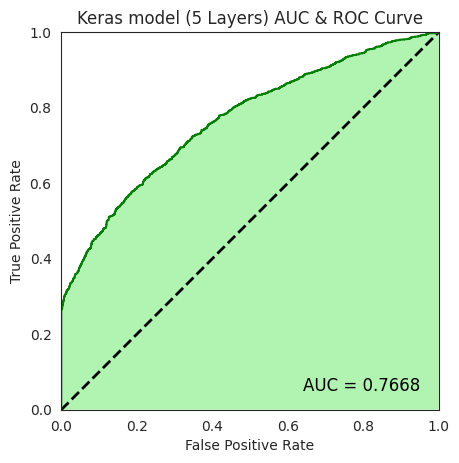

In [ ]:
# Keras model AUC and ROC curve.
k_roc_auc = roc_auc_score(y_k_test, model_opt.predict(X_k_test))
fpr, tpr, thresholds = roc_curve(y_k_test, model_opt.predict(X_k_test))
plt.figure(figsize = (5, 5), dpi = 100)
lw = 2
plt.axis('scaled')
plt.plot([0, 1], [0, 1],color = 'black', lw = lw, linestyle = '--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Keras model (5 Layers) AUC & ROC Curve')
plt.plot(fpr, tpr, 'green')
plt.fill_between(fpr, tpr, facecolor = 'lightgreen', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % k_roc_auc, ha ='right', fontsize = 12, color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Calculating the g-mean for each threshold
gmeans_ker_o = sqrt(tpr * (1 - fpr))

# Locating the index of the largest g-mean
ix_ker_o = argmax(gmeans_ker_o)

print('Best Threshold = %f, G-Mean = %.3f' % (thresholds[ix_ker_o], gmeans_ker_o[ix_ker_o]))

Best Threshold = 0.351152, G-Mean = 0.691


In [ ]:
y_pred_ker_o = model_opt.predict(X_k_test)

110/110 [==============================] - 0s 2ms/step


In [ ]:
# Defing thresholds.
thresholds = arange(0, 1, 0.001)

# Evaluating each threshold.
scores_ker_o = [f1_score(y_k_test, to_labels(y_pred_ker_o, t)) for t in thresholds]

# Getting best threshold.
ix_ker_o = argmax(scores_ker_o)
print('Optimal Threshold = %.3f, F-Score = %.5f' % (thresholds[ix_ker_o], scores_ker_o[ix_ker_o]))

Optimal Threshold = 0.300, F-Score = 0.58918


In [ ]:
# Applying optimal threshold.
threshold = 0.300
y_pred_ker_o_ = (model_opt.predict(X_k_test) > threshold).astype('float')
confusion_matrix(y_k_test, y_pred_ker_o_)

110/110 [==============================] - 0s 3ms/step


array([[1547,  820],
       [ 311,  811]])

In [ ]:
print(classification_report(y_k_test, y_pred_ker_o_, target_names = target_names))

                          precision    recall  f1-score   support

No risk of Heart disease       0.83      0.65      0.73      2367
At risk of Heart disease       0.50      0.72      0.59      1122

                accuracy                           0.68      3489
               macro avg       0.66      0.69      0.66      3489
            weighted avg       0.72      0.68      0.69      3489



110/110 [==============================] - 0s 2ms/step


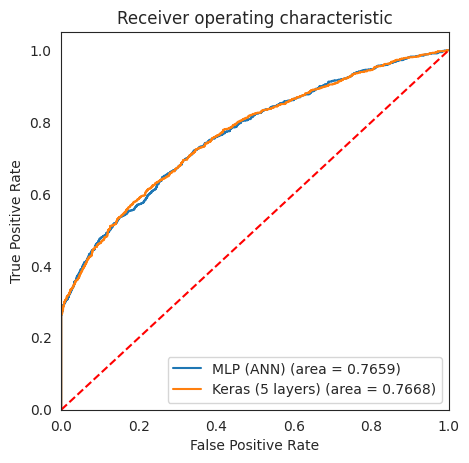

In [ ]:
# ROC AUC curves after optimization.
# MLP/ANN
ann_roc_auc = roc_auc_score(y_ann_test, MLPC_model_opt_61.predict_proba(X_ann_test)[:,1])
a_fpr, a_tpr, thresholds = roc_curve(y_ann_test, MLPC_model_opt_61.predict_proba(X_ann_test)[:,1])

# Keras (5 layers)
k_roc_auc = roc_auc_score(y_k_test, model_opt.predict(X_k_test))
k_fpr, k_tpr, thresholds = roc_curve(y_k_test, model_opt.predict(X_k_test))

plt.figure(figsize = (5, 5), dpi = 100)
plt.plot(a_fpr, a_tpr, label ='MLP (ANN) (area = %0.4f)' % ann_roc_auc)
plt.plot(k_fpr, k_tpr, label ='Keras (5 layers) (area = %0.4f)' % k_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Feature** **importance**

In [ ]:
# Using XGBoost model for displaying feature importance
# XGBoost ROC AUC is very close to MLPC and Keras.
from sklearn.inspection import permutation_importance
xg_reg.feature_importances_

array([0.02817868, 0.00386499, 0.00652162, 0.00988192, 0.010521  ,
       0.00384599, 0.00376773, 0.00831257, 0.01759741, 0.01460384,
       0.00219343, 0.00588443, 0.30142462, 0.30072507, 0.13881135,
       0.05347867, 0.09038664], dtype=float32)

Text(0.5, 0, 'Feature Importance')

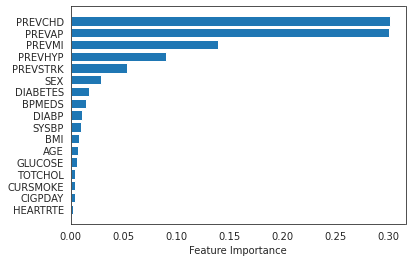

In [ ]:
sorted_idx = xg_reg.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], xg_reg.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")

Text(0.5, 1.0, 'Feature Importance')

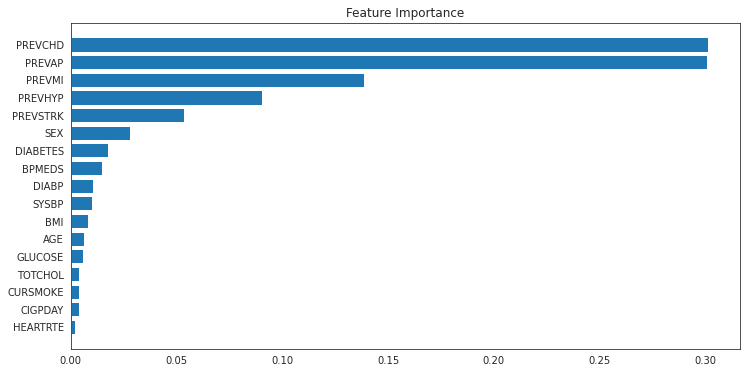

In [ ]:
feature_importance = xg_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize = (12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align = 'center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

Text(0.5, 1.0, 'Permutation Importance')

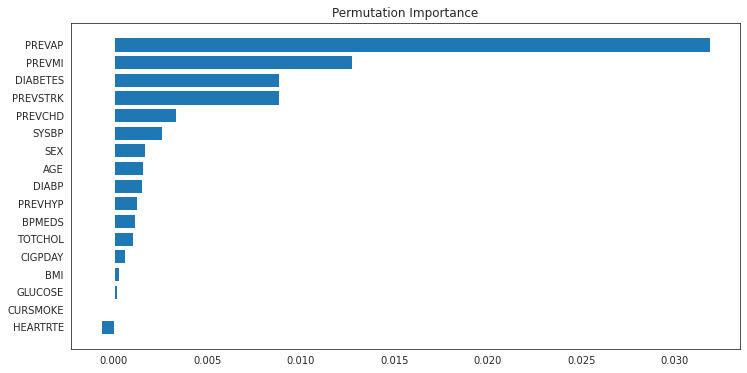

In [ ]:
perm_importance = permutation_importance(xg_reg, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('Permutation Importance')

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.8 MB/s 
     |████████████████████████████████| 133 kB 51.6 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=96d66bfdec01c198291c2184a50e9388229286a4849496f015810b8350d11daf
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
# Note that you can specify the metric that you would like to use to evaluate
# feature importance
# scoring=''
# list of metrics is available here
# https://scikit-learn.org/stable/modules/model_evaluation.html

# MLP (ANN model (nodes = 61)

perm = PermutationImportance(MLPC_model_opt_61, random_state = 1, scoring ="roc_auc").fit(X_ann_test, y_ann_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 5.4 MB/s 


In [ ]:
import shap
explainer = shap.TreeExplainer(xg_reg)
shap_values = explainer.shap_values(X_test)

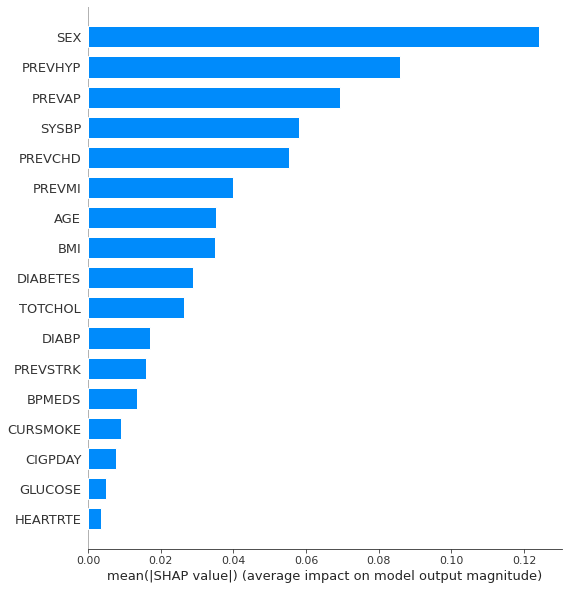

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type ="bar", )

**Plotting** **feature** **effects**

In [ ]:
heart_imputed.columns

Index(['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
       'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'PREVCHD', 'PREVAP',
       'PREVMI', 'PREVSTRK', 'PREVHYP', 'CHD'],
      dtype='object')

In [ ]:
gender_summary = heart_disease.groupby('SEX', as_index = False)['CHD'].mean()

In [ ]:
gender_summary = gender_summary.merge(heart_imputed.groupby('SEX', as_index = False)['CHD'].count(),
                                      left_on = 'SEX', right_on ='SEX', suffixes = ("_rate","_count"))

In [ ]:
gender_summary

SEX  CHD_rate  CHD_count
0    1  0.406014       5022
1    2  0.260863       6605

In [ ]:
gender_summary = gender_summary.replace({'SEX': {1: 'Male', 2: 'Female'}})
gender_summary

SEX  CHD_rate  CHD_count
0    Male  0.406014       5022
1  Female  0.260863       6605

<BarContainer object of 2 artists>

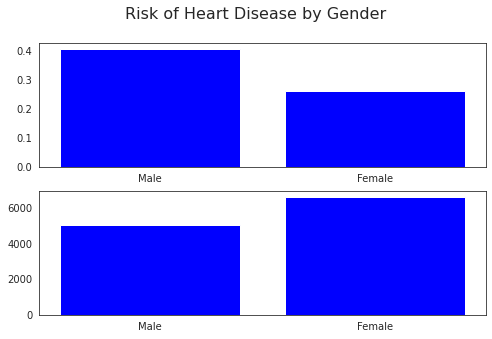

In [ ]:
fig, axs = plt.subplots(2, figsize = (8,5))

fig.suptitle('Risk of Heart Disease by Gender', fontsize = 16)
axs[0].bar(gender_summary.SEX, gender_summary.CHD_rate, color = 'blue')
axs[1].bar(gender_summary.SEX, gender_summary.CHD_count, color = 'blue')


Observed effect:
- Males were much more likely to have a CHD than women (40.60% vs 26.09%).
- Females outnumbered males 6605 vs 5022.

In [ ]:
# Setup bin ranges, could be equally spaced or not
age_bins = [30, 50, 70, 90]
age_summary = heart_imputed.groupby(pd.cut(heart_imputed['AGE'], bins = age_bins))['CHD'].agg(['mean', 'size'])

In [ ]:
age_summary

mean  size
AGE                     
(30, 50]  0.218880  4089
(50, 70]  0.366976  6886
(70, 90]  0.521472   652

In [ ]:
# Need to reset index to convert Age to a column
age_summary.reset_index(inplace = True)

In [ ]:
age_summary

AGE      mean  size
0  (30, 50]  0.218880  4089
1  (50, 70]  0.366976  6886
2  (70, 90]  0.521472   652

<BarContainer object of 3 artists>

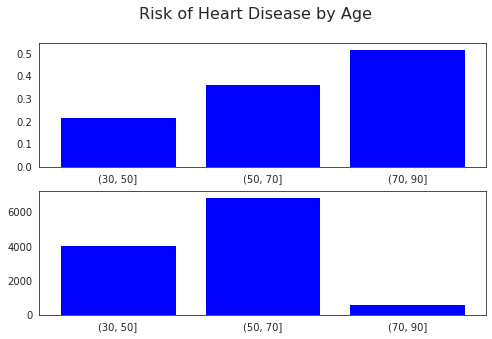

In [ ]:
fig2, axs2 = plt.subplots(2, figsize=(8,5))

fig2.suptitle('Risk of Heart Disease by Age', fontsize = 16)
axs2[0].bar(age_summary.AGE.astype('str'), age_summary['mean'], color = 'blue')
axs2[1].bar(age_summary.AGE.astype('str'), age_summary['size'], color = 'blue')

Observed effect:
- Patients (from 70 to 90) were much more likely to have coronary heart disease in feature (28.5% vs. 10.1% average)
- There were only 652 patients of this age category.

In [ ]:
# Setup bin ranges, could be equally spaced or not
systolic_blood_pressure_bins = [80, 130, 180, 300]

In [ ]:
systolic_blood_pressure_summary = heart_imputed.groupby(pd.cut(heart_imputed['SYSBP'],
                                                               bins = systolic_blood_pressure_bins))['CHD'].agg(['mean', 'size'])

In [ ]:
systolic_blood_pressure_summary

mean  size
SYSBP                     
(80, 130]   0.227180  5401
(130, 180]  0.389152  5697
(180, 300]  0.601134   529

In [ ]:
# Need to reset index to convert Age to a column
systolic_blood_pressure_summary.reset_index(inplace = True)

In [ ]:
systolic_blood_pressure_summary

SYSBP      mean  size
0   (80, 130]  0.227180  5401
1  (130, 180]  0.389152  5697
2  (180, 300]  0.601134   529

<BarContainer object of 3 artists>

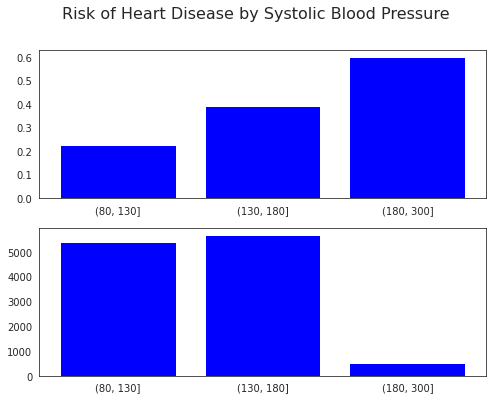

In [ ]:
fig2, axs2 = plt.subplots(2, figsize = (8, 6))

fig2.suptitle('Risk of Heart Disease by Systolic Blood Pressure', fontsize = 16)
axs2[0].bar(systolic_blood_pressure_summary.SYSBP.astype('str'), systolic_blood_pressure_summary['mean'], color = 'blue')
axs2[1].bar(systolic_blood_pressure_summary.SYSBP.astype('str'), systolic_blood_pressure_summary['size'], color = 'blue')

In [ ]:
pain_summary = heart_disease.groupby('PREVAP', as_index = False)['CHD'].mean()

In [ ]:
pain_summary = pain_summary.merge(heart_imputed.groupby('PREVAP', as_index = False)['CHD'].count(),
                                      left_on = 'PREVAP', right_on ='PREVAP', suffixes = ("_rate","_count"))

In [ ]:
pain_summary

PREVAP  CHD_rate  CHD_count
0       0     0.285      11000
1       1     1.000        627

In [ ]:
pain_summary = pain_summary.replace({'PREVAP': {0: 'No Angina prevalence ', 1: 'Angina prevalence'}})
pain_summary

PREVAP  CHD_rate  CHD_count
0  No Angina prevalence      0.285      11000
1      Angina prevalence     1.000        627

<BarContainer object of 2 artists>

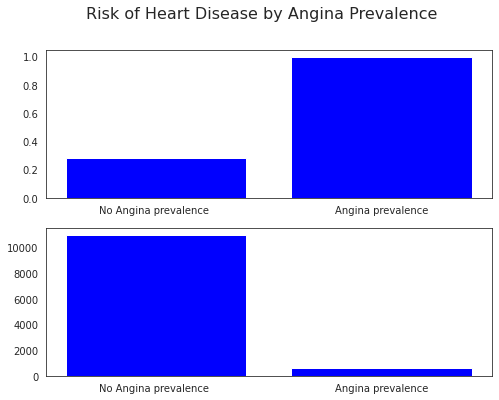

In [ ]:
fig, axs = plt.subplots(2, figsize = (8,6))

fig.suptitle('Risk of Heart Disease by Angina Prevalence', fontsize = 16)
axs[0].bar(pain_summary.PREVAP, pain_summary.CHD_rate, color = 'blue')
axs[1].bar(pain_summary.PREVAP, pain_summary.CHD_count, color = 'blue')

In [ ]:
hyp_summary = heart_disease.groupby('PREVHYP', as_index = False)['CHD'].mean()

In [ ]:
hyp_summary = hyp_summary.merge(heart_imputed.groupby('PREVHYP', as_index = False)['CHD'].count(),
                                      left_on = 'PREVHYP', right_on ='PREVHYP', suffixes = ("_rate","_count"))

In [ ]:
hyp_summary

PREVHYP  CHD_rate  CHD_count
0        0  0.229349       6283
1        1  0.434319       5344

In [ ]:
hyp_summary = hyp_summary.replace({'PREVHYP': {0: 'No hypertension', 1: 'Hypertension'}})
hyp_summary

PREVHYP  CHD_rate  CHD_count
0  No hypertension  0.229349       6283
1     Hypertension  0.434319       5344

<BarContainer object of 2 artists>

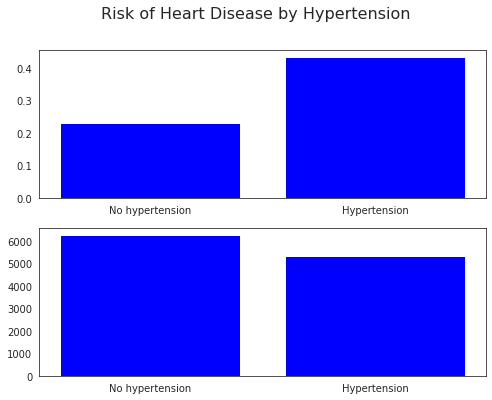

In [ ]:
fig, axs = plt.subplots(2, figsize = (8,6))

fig.suptitle('Risk of Heart Disease by Hypertension', fontsize = 16)
axs[0].bar(hyp_summary.PREVHYP, hyp_summary.CHD_rate, color = 'blue')
axs[1].bar(hyp_summary.PREVHYP, hyp_summary.CHD_count, color = 'blue')